## Credit Card Fraud Detection

In [38]:
# importing the required packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

pd.set_option("display.max_columns", 300)
from sklearn.metrics import roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier


## Exploratory data analysis

In [39]:
# creating a dataframe from the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observing the different feature type present in the data and if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

 It is clear that there are no null values in the dataset and that all the columns contain numeric values

In [4]:
# stastics of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


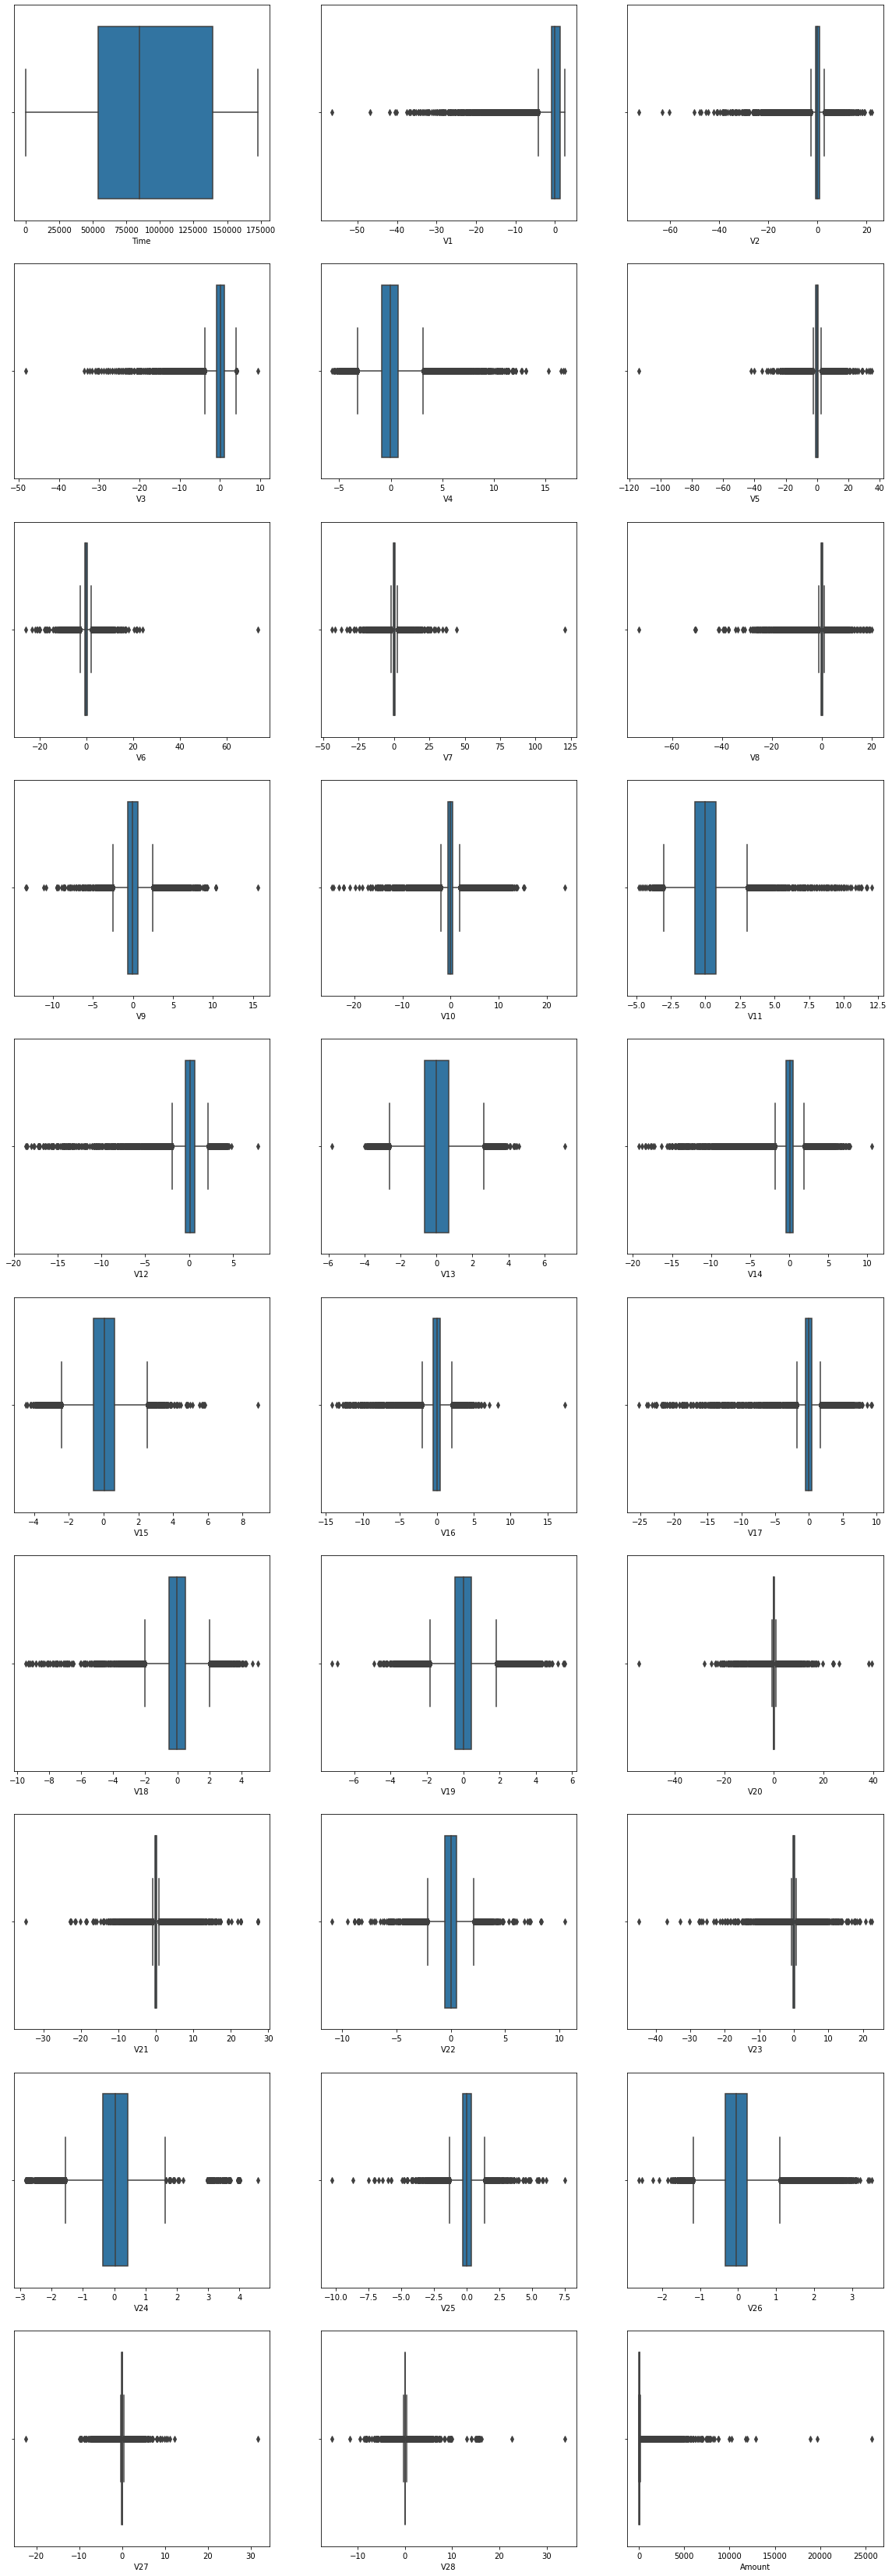

In [5]:
# plotting the boxplots of the features to observe their distribution
plt.figure(figsize=(20, 60))
for n, c in enumerate(df.columns[0:30]):
    plt.subplot(10,3,n+1)
    ax = sns.boxplot(df[c])
plt.show()

Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

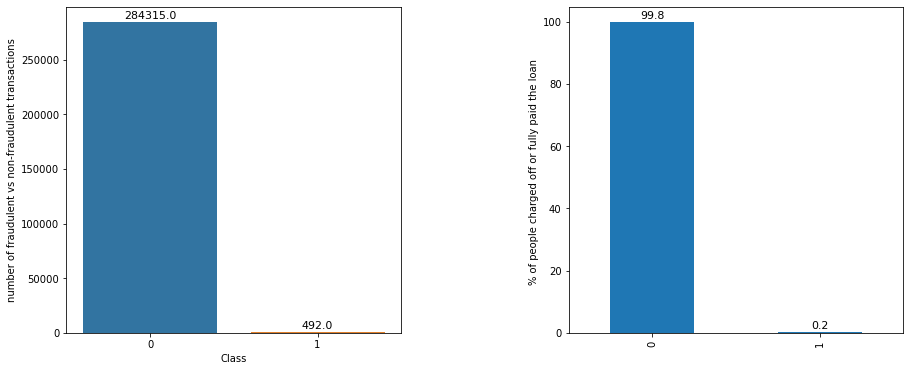

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
def showvalues(ax,m=None):
    for p in ax.patches:
        ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),\
                    ha='center', va='center', fontsize=11, color='k', rotation=0, xytext=(0, 7),\
                    textcoords='offset points',fontweight='light',alpha=1) 
fig = plt.figure(figsize=(15,6))
fig.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
ax1 =sns.countplot(df['Class'])
ax1.set_ylabel('number of fraudulent vs non-fraudulent transactions', fontsize=10)
showvalues(ax1)
plt.subplot(1,2,2)
ax2 = (df.Class.value_counts(normalize=True)*100).plot(kind='bar')
ax2.set_ylabel('% of people charged off or fully paid the loan ', fontsize=10)
showvalues(ax2)

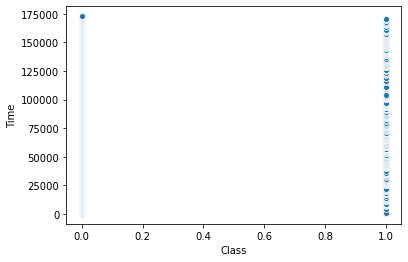

In [8]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x = 'Class',y = 'Time',data = df)

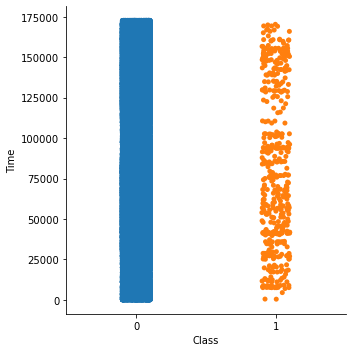

In [3]:
# creating a catplot to get a clearer idea of the distribution of classes with time
sns.catplot(x = 'Class',y = 'Time',data = df)

#### The variable 'Time' does not seem to be useful and can therefore be removed from the dataset

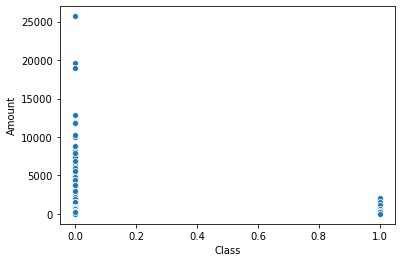

In [9]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x = 'Class',y = 'Amount',data = df)

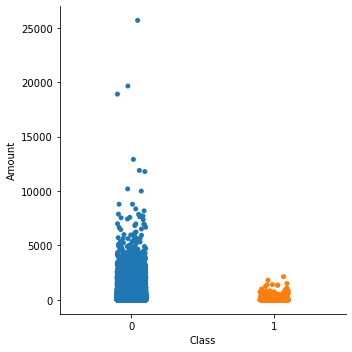

In [4]:
# creating a catplot to get a clearer idea of the distribution of classes with Amount
sns.catplot(x = 'Class',y = 'Amount',data = df)

#### It seems that fraud is committed mostly for amounts less than 2500

In [10]:
# Drop unnecessary columns
df.drop('Time', axis = 1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


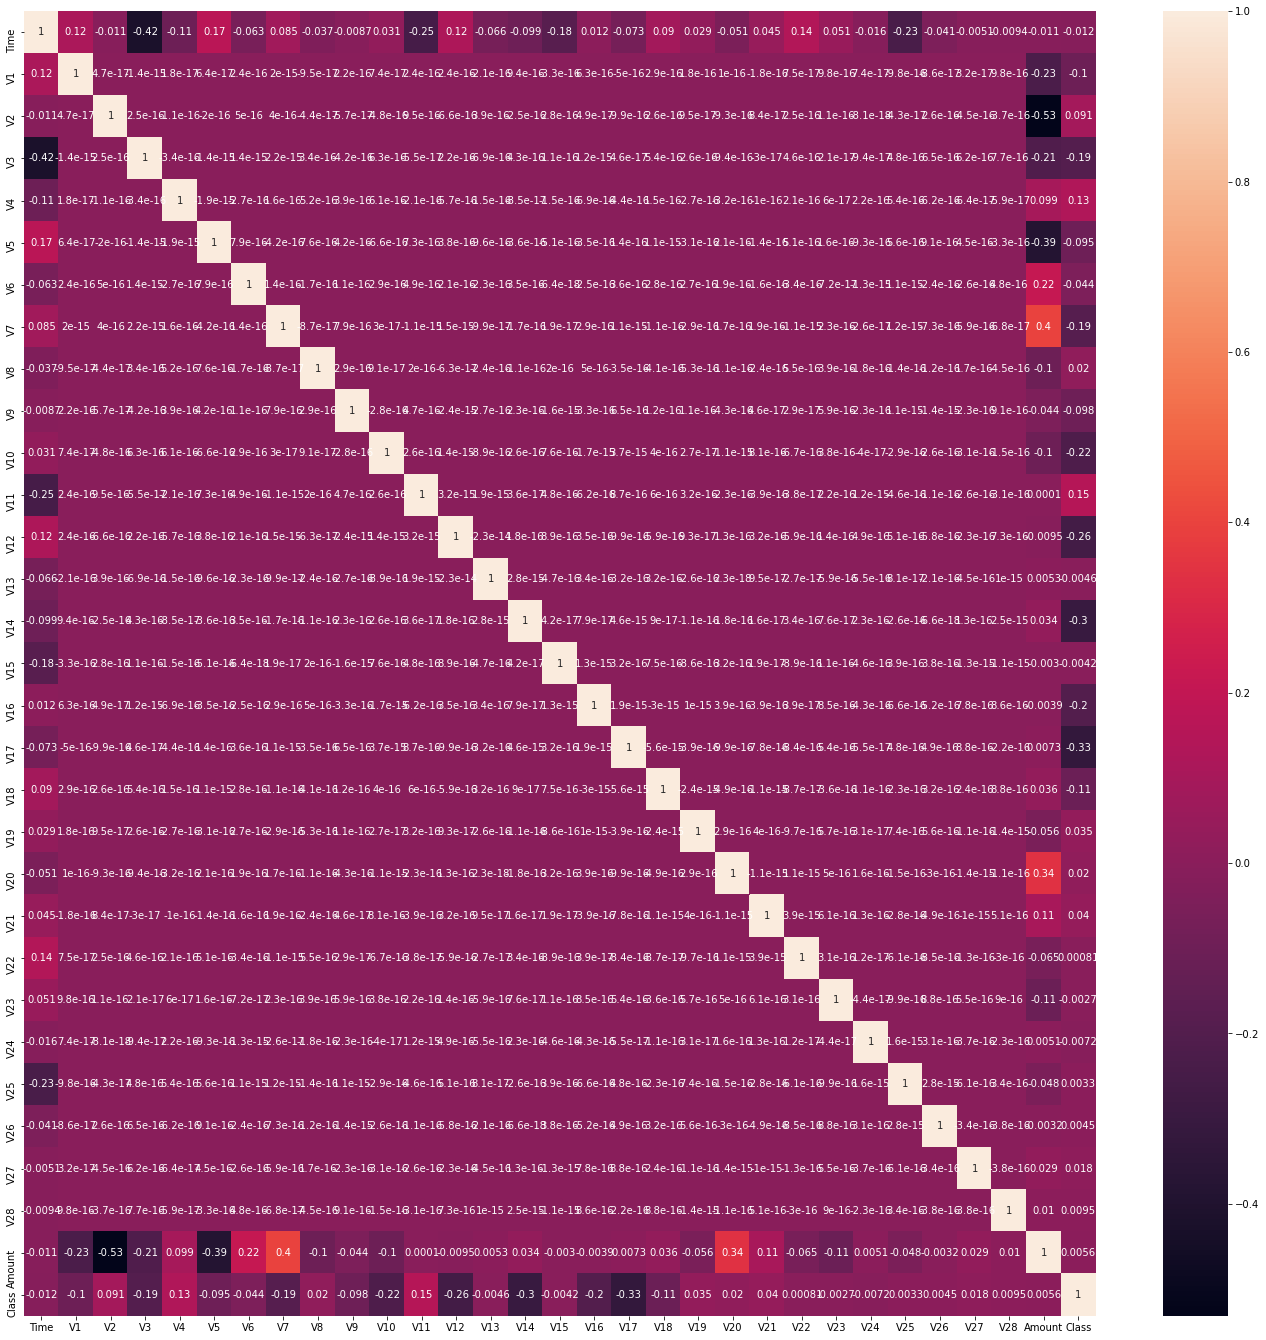

In [11]:
#plotiing the heatmap to get an understanding of the correlation between the features and classes
plt.figure(figsize=(24,24))
cor = df.corr()
sns.heatmap(cor, annot = True)
plt.show()

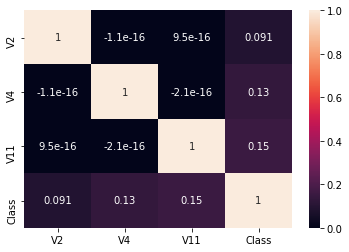

In [12]:
# Since the heatmap with all the features are hard to read, plotting a heatmap of only the features with the highest correlation with the target variable
cols = cor.index[abs(cor['Class']>0.09)]
top_corr = df[cols].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

#### There doesnt seem to be any variables with very high correlation to the target variable or to each other

### Splitting the data into train & test data

In [5]:
# Splitting the target variable from the dataset
y= df['Class']

In [95]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop('Class', axis = 1),y,train_size=0.7,test_size=0.3,random_state=100, stratify=y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [15]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

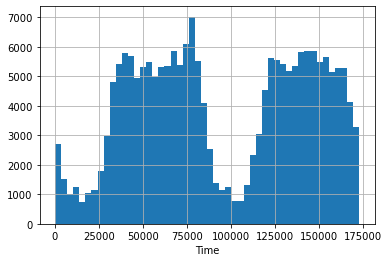

skewness = -0.03380673697219291


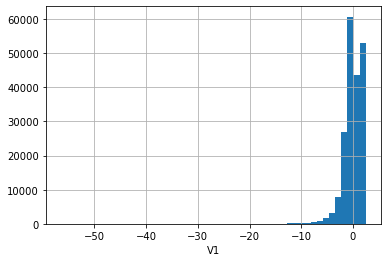

skewness = -3.352780393800281


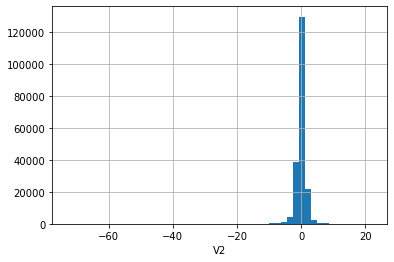

skewness = -4.743314414717319


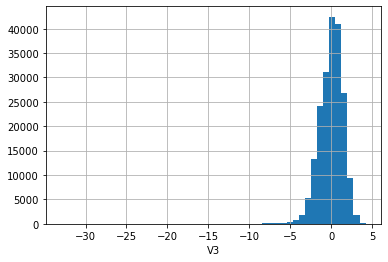

skewness = -2.115044296160982


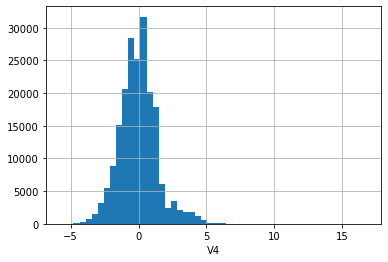

skewness = 0.6712343588749465


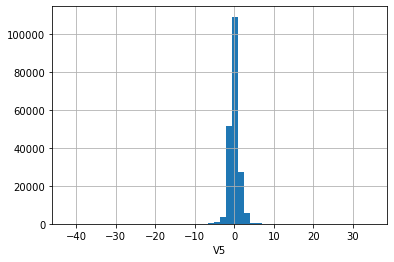

skewness = -0.3354226905908675


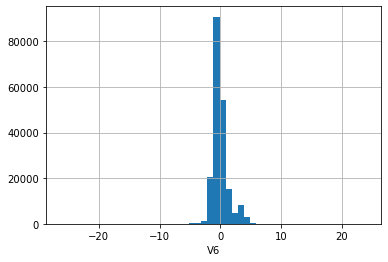

skewness = 1.2132128489589589


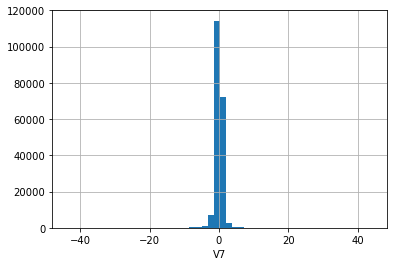

skewness = -1.0544407636894357


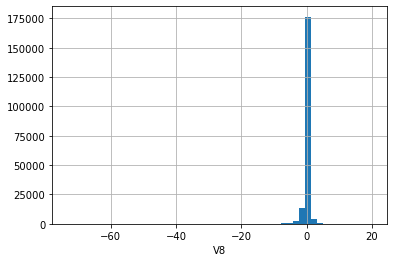

skewness = -9.04826589585346


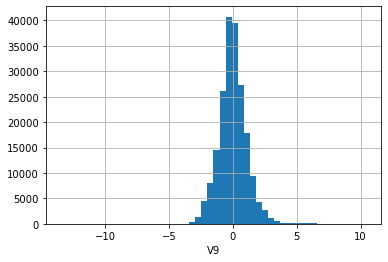

skewness = 0.5248531881038306


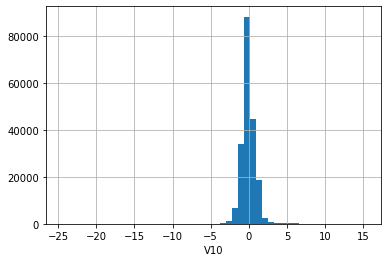

skewness = 1.0461839272889941


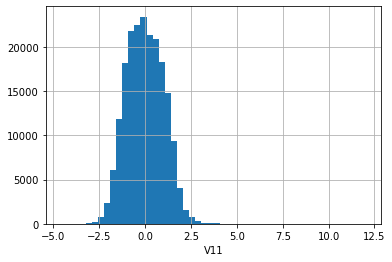

skewness = 0.3372347990100604


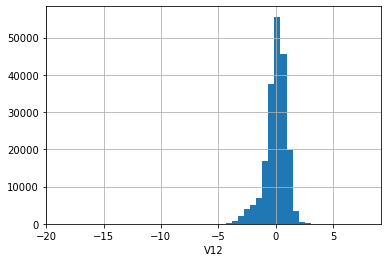

skewness = -2.187217141546217


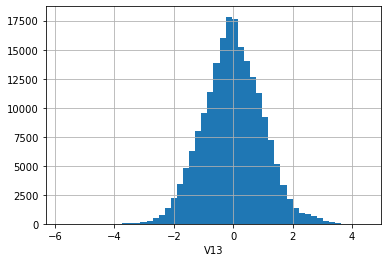

skewness = 0.06792984061116872


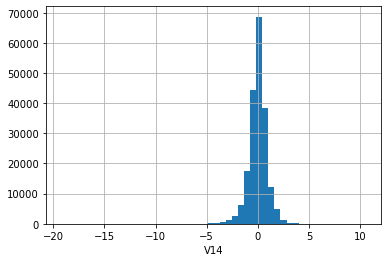

skewness = -1.913552066835225


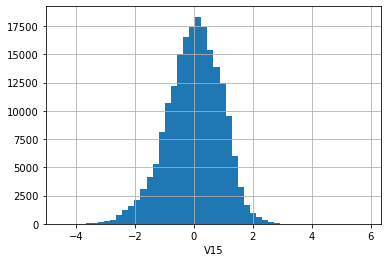

skewness = -0.3112234161397688


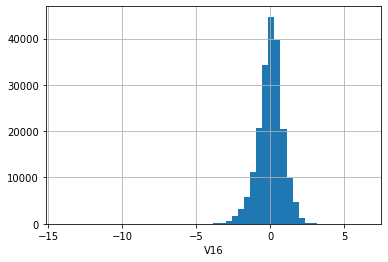

skewness = -1.0575028701915397


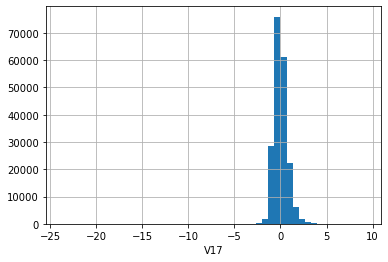

skewness = -3.526078884894078


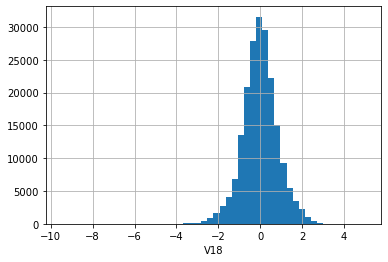

skewness = -0.2483541694915622


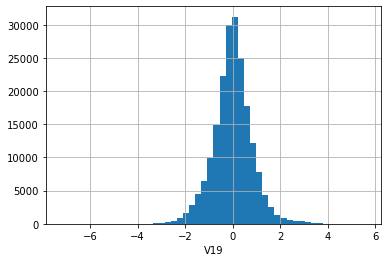

skewness = 0.11672034533445494


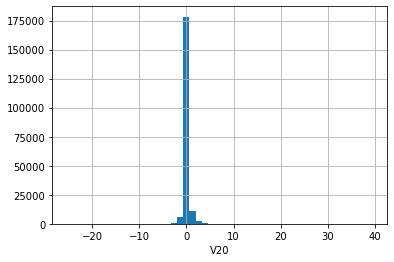

skewness = -1.3777512522033144


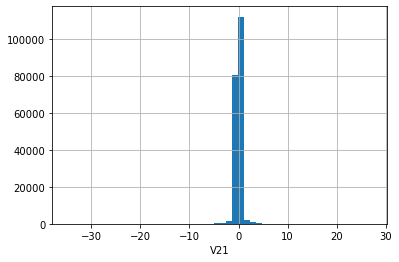

skewness = 3.490871900572473


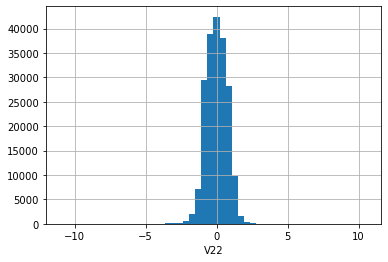

skewness = -0.21868951634168513


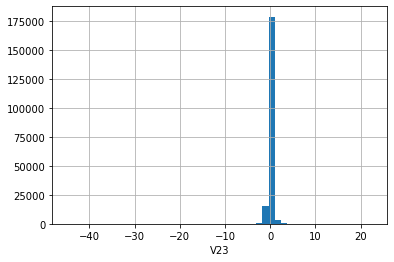

skewness = -6.872356257344557


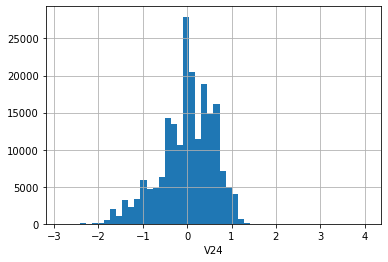

skewness = -0.5406952694368877


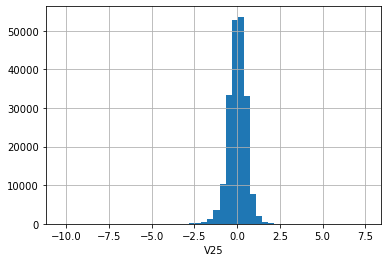

skewness = -0.42910082828675233


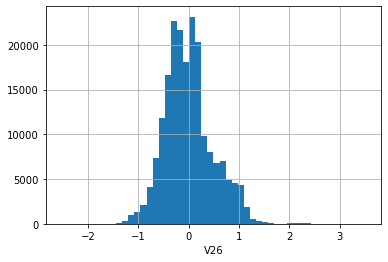

skewness = 0.5673424705167717


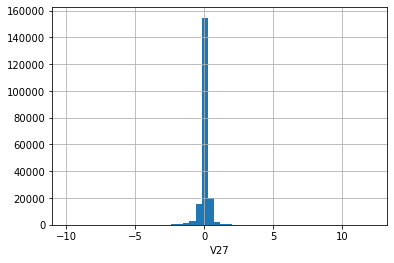

skewness = -2.1752406792716137


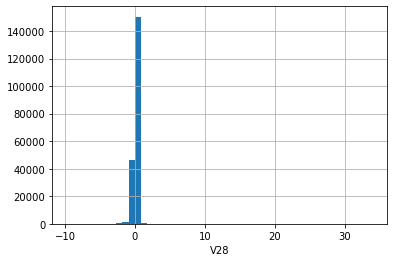

skewness = 13.80315456755782


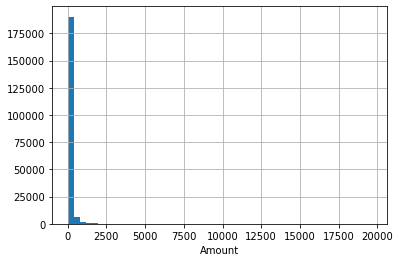

skewness = 13.520470388747102


In [16]:
# plot the histogram of a variable from the dataset to see the skewness
for c in X_train.columns:
    ax = X_train[c].hist(bins = 50)
    ax.set_xlabel(c)
    plt.show()
    print('skewness =', X_train[c].skew())

#### We can see that many of the variables are skewed. They need to be transformed before using them to build models

In [96]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
power = preprocessing.PowerTransformer(copy=False)
train_data = power.fit_transform(X_train.values)
test_data = power.fit_transform(X_test.values)
X_train = pd.DataFrame(train_data, columns = X_train.columns)
X_test = pd.DataFrame(test_data, columns = X_test.columns)

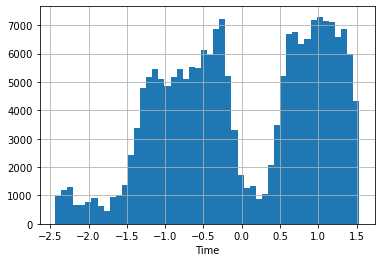

skewness = -0.22868131278131007


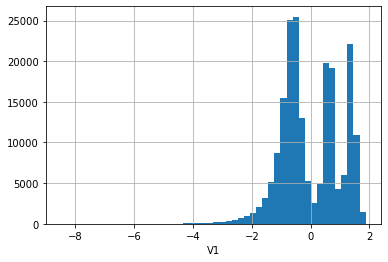

skewness = -0.21865876946826787


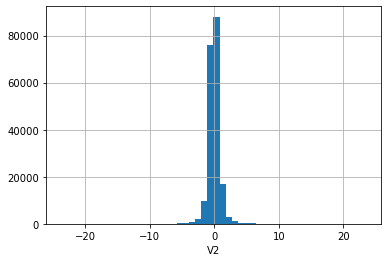

skewness = 0.34819959396008815


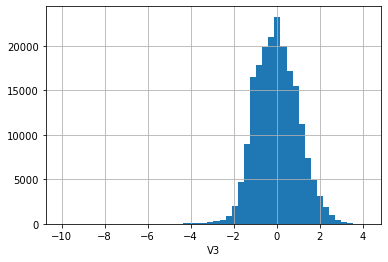

skewness = -0.07935065770840456


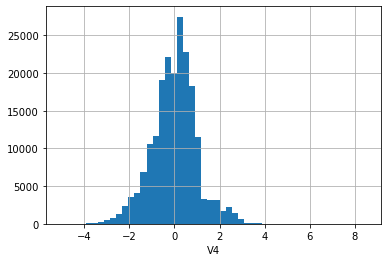

skewness = 0.018358383365998498


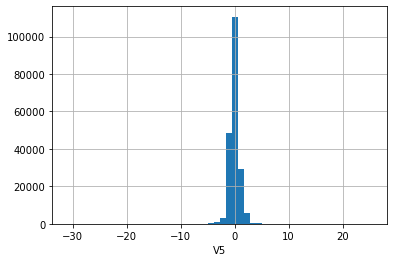

skewness = -0.3468997814084011


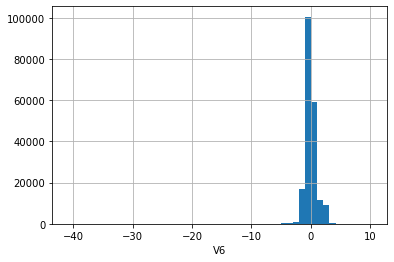

skewness = -1.9937517844552592


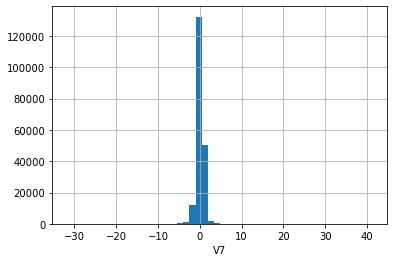

skewness = 0.6060208408305281


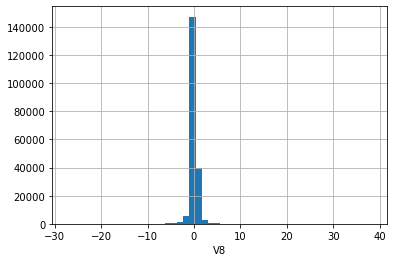

skewness = 2.389015774242763


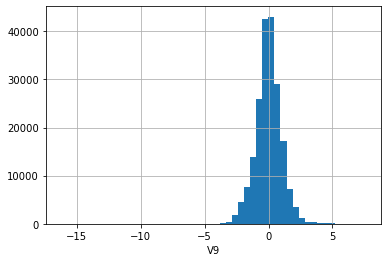

skewness = -0.060697550353436436


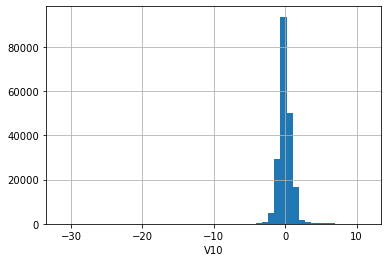

skewness = -1.3567704333865427


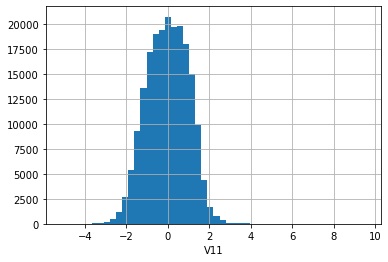

skewness = 0.05708770496608148


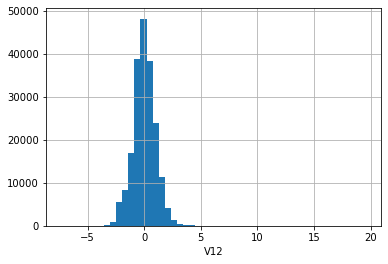

skewness = 0.1653180421030734


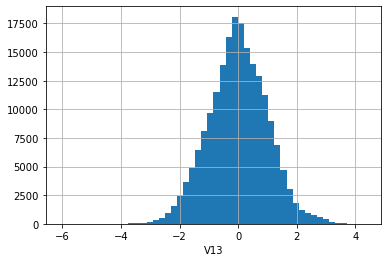

skewness = 0.005926257198471918


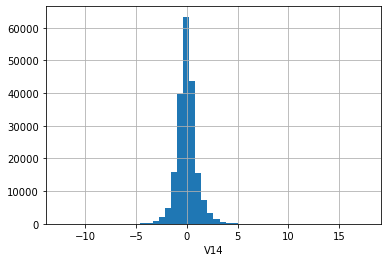

skewness = 0.10800312250196155


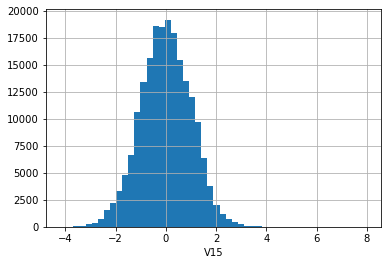

skewness = 0.00991220610795096


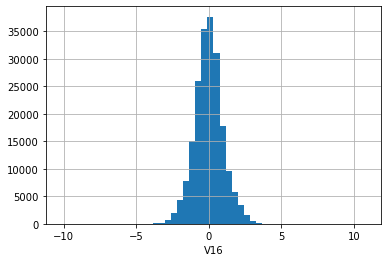

skewness = 0.027145020549947323


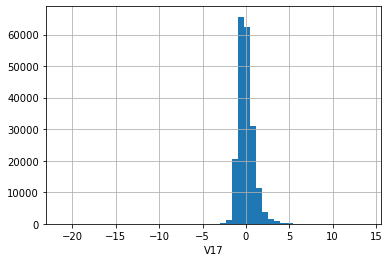

skewness = -0.8258307453177003


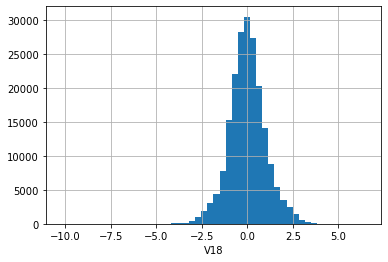

skewness = -0.057165956565338974


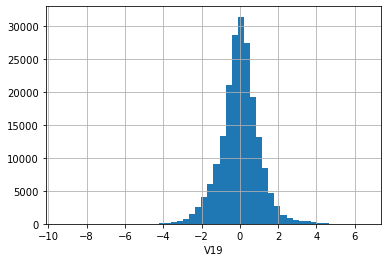

skewness = 0.016301667635898638


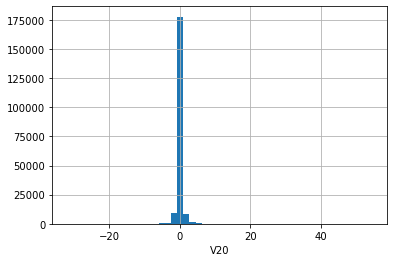

skewness = -0.4815869170584072


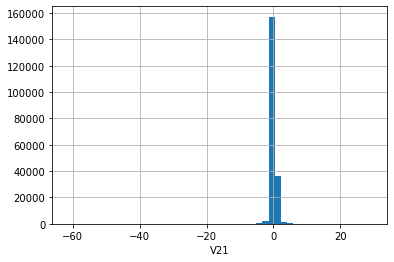

skewness = -2.0813823284034974


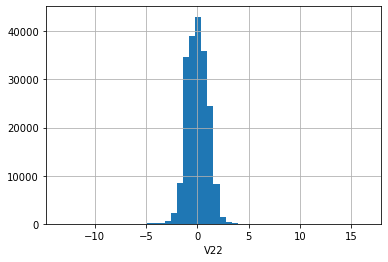

skewness = -0.019892712601901657


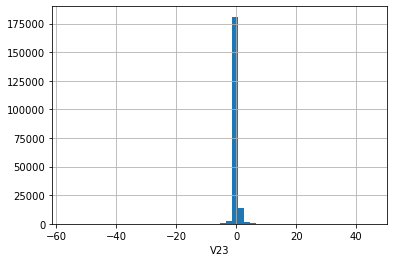

skewness = -0.02090032753650503


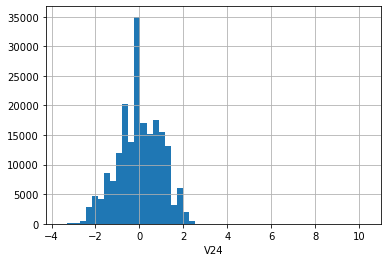

skewness = 0.12327541509731475


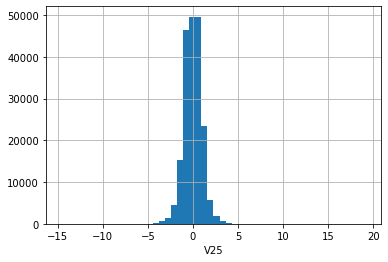

skewness = 0.08271823328315821


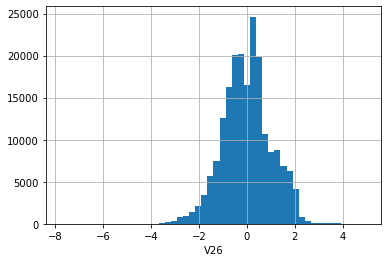

skewness = -0.023450322690462388


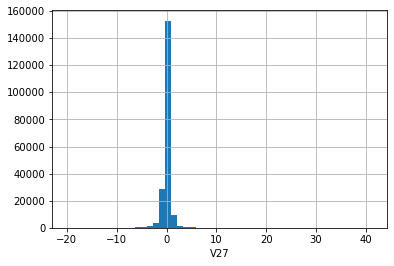

skewness = 1.3267148800602377


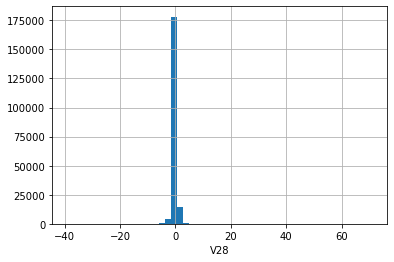

skewness = 1.207900390014161


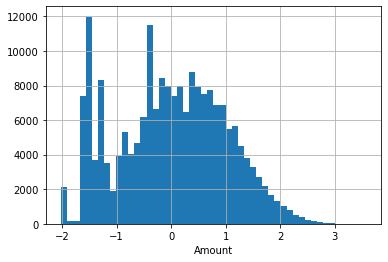

skewness = 0.01788767105303064


In [18]:
# plot the histogram of a variable from the dataset again to see the result 
for c in X_train.columns:
    ax = X_train[c].hist(bins = 50)
    ax.set_xlabel(c)
    plt.show()
    print('skewness =', X_train[c].skew())

Skewness has been corrected to a large extent

## Model Building
- Build different models on the imbalanced dataset and see the result

In [41]:
# Logistic Regression
from sklearn import linear_model #import the package
num_C = [0.001,0.01,0.1,1,10]
cv_num = 5

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [97]:
#importing the packages for crossvalidation and gridsearch
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#performing cross validation to create the cross validation train and test sets which will be used throughout for model buiding
cv = StratifiedKFold(n_splits=cv_num, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

### Logistic regresion 

In [21]:
#performing hyperparameter tuning for model with L2 regression
grid_search = GridSearchCV(estimator = linear_model.LogisticRegression(),
                            param_grid = {'C': num_C}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_train_cv, y_train_cv)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   58.5s finished


Best score: 0.9808472079690087
Best parameters: {'C': 0.01}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.816486,0.305885,0.088132,0.077121,0.001,{'C': 0.001},0.972814,0.971378,0.979637,0.981702,0.980783,0.977263,0.004293,3,0.980492,0.984955,0.982773,0.978984,0.982360,0.981913,0.002039
1,1.901644,0.162297,0.056237,0.044843,0.01,{'C': 0.01},0.975744,0.979869,0.983527,0.988114,0.976982,0.980847,0.004515,1,0.985290,0.987721,0.987346,0.983314,0.988369,0.986408,0.001859
2,2.792511,0.183359,0.027612,0.017717,0.1,{'C': 0.1},0.975007,0.979153,0.978686,0.988957,0.970862,0.978533,0.006006,2,0.984190,0.985619,0.986253,0.981546,0.988015,0.985125,0.002170
3,2.974319,0.056410,0.071859,0.007649,1,{'C': 1},0.974228,0.978413,0.976340,0.988730,0.968122,0.977166,0.006729,4,0.983102,0.984097,0.985275,0.980240,0.987340,0.984011,0.002355
4,2.793243,0.193933,0.054916,0.019567,10,{'C': 10},0.974091,0.978310,0.976030,0.988694,0.967784,0.976982,0.006823,5,0.982952,0.983895,0.985128,0.980054,0.987241,0.983854,0.002381


In [22]:
# building a model with the hyperparameters obtained from the gridsearch and training it
lr_model = linear_model.LogisticRegression(C=0.01)
lr_model.fit(X_train_cv, y_train_cv)
#making predictions and calculating the score for train and test sets
y_train_pred = lr_model.predict(X_train_cv)
print('train score =',roc_auc_score(y_true=y_train_cv, y_score=y_train_pred))
y_test_pred = lr_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.8187809123400314
test score = 0.7646556361465296


ROC for the test dataset 97.0%


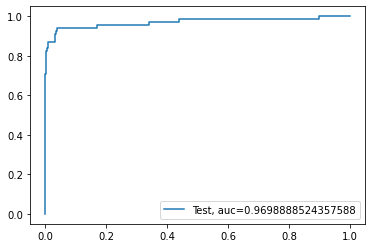

threshold value = 0.0013668855211989653


In [23]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = lr_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

In [24]:
#performing hyperparameter tuning for model with L1 regression
grid_search = GridSearchCV(estimator = linear_model.LogisticRegression(penalty='l1', solver ='liblinear'),
                            param_grid = {'C': num_C}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_train_cv, y_train_cv)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   48.9s finished


Best score: 0.9820099857033032
Best parameters: {'C': 0.1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.724183,0.169843,0.067055,0.032663,0.001,{'C': 0.001},0.867332,0.898095,0.877683,0.882801,0.916976,0.888577,0.017324,5,0.886734,0.908175,0.881025,0.850663,0.894178,0.884155,0.019056
1,3.116892,0.194870,0.045666,0.025698,0.01,{'C': 0.01},0.946793,0.970289,0.970220,0.974822,0.984679,0.969361,0.012453,4,0.976134,0.970371,0.970421,0.967250,0.967123,0.970260,0.003269
2,5.606396,0.526195,0.058631,0.015232,0.1,{'C': 0.1},0.976230,0.981086,0.987844,0.990288,0.974603,0.982010,0.006192,1,0.985992,0.985607,0.987030,0.981889,0.989913,0.986086,0.002584
3,10.169020,1.028107,0.049868,0.015592,1,{'C': 1},0.974702,0.978504,0.977756,0.988705,0.968493,0.977632,0.006565,2,0.983597,0.984849,0.985695,0.980810,0.987861,0.984562,0.002335
4,10.461993,1.275865,0.056903,0.028727,10,{'C': 10},0.974139,0.978329,0.976191,0.988696,0.967811,0.977033,0.006809,3,0.983001,0.983971,0.985173,0.980115,0.987296,0.983911,0.002379


In [25]:
# building the model with the hyperparameters obtained from the gridsearch and training it
lr_model = linear_model.LogisticRegression(C=0.1, penalty='l1', solver ='liblinear')
lr_model.fit(X_train_cv, y_train_cv)
#making predictions and calculating the score for train and test sets
y_train_pred = lr_model.predict(X_train_cv)
print('train score =',roc_auc_score(y_true=y_train_cv, y_score=y_train_pred))
y_test_pred = lr_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.8278357429666234
test score = 0.7867144596759414


ROC for the test dataset 97.2%


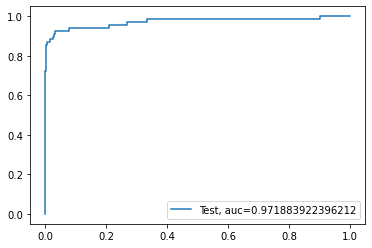

threshold value = 0.0018769704872392825


In [26]:
#plotting the ROC curve for the model and getting the threshold value
y_pred_probs = lr_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### KNN

In [27]:
#perform hyperparameter tuning
from sklearn.neighbors import KNeighborsClassifier
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                            param_grid = {'n_neighbors': [3,5,7]}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_train_cv, y_train_cv)

#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 241.6min finished


Best score: 0.9327955815842353
Best parameters: {'n_neighbors': 7}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.526374,0.484285,683.272945,13.521960,3,{'n_neighbors': 3},0.918084,0.910641,0.908964,0.945390,0.918094,0.920234,0.013123,3,0.999967,0.999962,0.999954,0.999962,0.999968,0.999963,0.000005
1,9.723952,0.712026,780.551283,21.688657,5,{'n_neighbors': 5},0.927151,0.928467,0.908940,0.954441,0.927132,0.929226,0.014537,2,0.999925,0.999924,0.999921,0.999914,0.999925,0.999922,0.000004
2,8.945308,0.133779,846.153065,41.599098,7,{'n_neighbors': 7},0.927127,0.937375,0.908882,0.963502,0.927091,0.932796,0.017891,1,0.999884,0.999880,0.999893,0.999874,0.999900,0.999886,0.000009


In [28]:
# building the model with the hyperparameters obtained from the gridsearch and training it
knn_model = KNeighborsClassifier(n_neighbors = 7)
knn_model.fit(X_train_cv,y_train_cv)
#making predictions and calculating the score for train and test sets
y_train_pred = knn_model.predict(X_train_cv)
print('train score =',roc_auc_score(y_true=y_train_cv, y_score=y_train_pred))
y_test_pred = knn_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.887634053601779
test score = 0.8381850479112357


ROC for the test dataset 89.0%


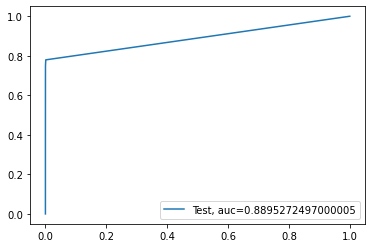

threshold value = 0.14285714285714285


In [29]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = knn_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

### SVM

In [30]:
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator = svm.SVC(),
                            param_grid = {'kernel':('linear', 'rbf', 'sigmoid'), 'C':[1, 5, 10]}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_train_cv, y_train_cv)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 64.3min finished


Best score: 0.9768928464389202
Best parameters: {'C': 10, 'kernel': 'linear'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,178.334237,32.684081,0.788737,0.093878,1,linear,"{'C': 1, 'kernel': 'linear'}",0.973383,0.977774,0.979545,0.988037,0.965504,0.976848,0.007403,3,0.981501,0.981950,0.977974,0.977514,0.985430,0.980874,0.002899
1,165.495085,11.285585,9.528865,0.305039,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.975417,0.953895,0.948919,0.960986,0.958709,0.959585,0.008939,5,0.999629,0.999622,0.999985,0.999476,0.999707,0.999684,0.000168
2,6.489490,0.830494,0.986598,0.056080,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.749844,0.869416,0.885152,0.945428,0.835968,0.857162,0.064328,9,0.721637,0.910634,0.864454,0.900822,0.863389,0.852187,0.067972
3,832.531184,354.096699,0.789706,0.141061,5,linear,"{'C': 5, 'kernel': 'linear'}",0.973621,0.977820,0.979385,0.988154,0.965389,0.976874,0.007442,2,0.981618,0.981956,0.977747,0.977542,0.985431,0.980859,0.002945
4,121.732588,6.462990,7.908235,0.175935,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.964419,0.949739,0.957377,0.955239,0.963953,0.958145,0.005528,6,0.999915,0.999999,0.999999,0.999924,1.000000,0.999968,0.000039
5,6.496843,0.437851,0.891931,0.063428,5,sigmoid,"{'C': 5, 'kernel': 'sigmoid'}",0.930413,0.852783,0.880263,0.944975,0.894164,0.900520,0.033465,7,0.850683,0.895066,0.861309,0.899854,0.920370,0.885456,0.025733
6,1308.438015,255.922993,1.820783,1.196363,10,linear,"{'C': 10, 'kernel': 'linear'}",0.973311,0.977853,0.979414,0.988515,0.965372,0.976893,0.007588,1,0.981442,0.981954,0.977828,0.977664,0.985438,0.980865,0.002895
7,119.492799,16.943807,7.254157,0.614085,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.971037,0.949067,0.966126,0.949913,0.971947,0.961618,0.010102,4,1.000000,1.000000,1.000000,0.999918,1.000000,0.999984,0.000033
8,5.804268,0.494619,1.014285,0.136951,10,sigmoid,"{'C': 10, 'kernel': 'sigmoid'}",0.917518,0.860829,0.880263,0.915956,0.835483,0.882010,0.031716,8,0.894514,0.909139,0.861309,0.820310,0.849784,0.867011,0.031754


In [31]:
# building the model with the hyperparameters obtained from the gridsearch and training it
svm_model = svm.SVC(C = 10, kernel = 'linear', probability = True)
svm_model.fit(X_train_cv,y_train_cv)
#making predictions and calculating the score for train and test sets
y_train_pred = svm_model.predict(X_train_cv)
print('train score =',roc_auc_score(y_true=y_train_cv, y_score=y_train_pred))
y_test_pred = svm_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.9074956416877481
test score = 0.8675465664107066


ROC for the test dataset 96.1%


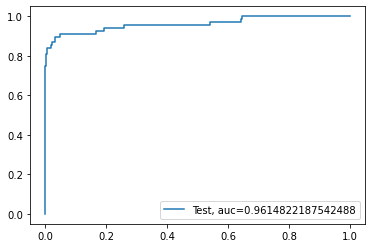

threshold value = 0.0008185762544707737


In [32]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = svm_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

### Decision Tree

In [101]:
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(),
                            param_grid = {'criterion':['gini','entropy'],
                                          'min_samples_leaf': [1,10,100],
                                          'min_samples_split': [2, 20, 200]}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_train_cv, y_train_cv)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  7.0min finished


Best score: 0.9393098335504085
Best parameters: {'criterion': 'entropy', 'min_samples_leaf': 100, 'min_samples_split': 2}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,26.805000,2.270109,0.040196,0.008866,gini,1,2,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.872539,0.856860,0.917931,0.926833,0.817978,0.878428,0.040144,18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,26.456635,2.860773,0.037276,0.008401,gini,1,20,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.899745,0.910440,0.917853,0.935979,0.854207,0.903645,0.027397,16,0.999974,0.999970,0.999976,0.999964,0.999982,0.999973,0.000006
2,27.167673,2.693303,0.050327,0.009484,gini,1,200,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.908216,0.918824,0.935286,0.971995,0.935115,0.933887,0.021641,5,0.999686,0.999583,0.999586,0.999614,0.999510,0.999596,0.000057
3,25.546708,1.461553,0.040720,0.010397,gini,10,2,"{'criterion': 'gini', 'min_samples_leaf': 10, ...",0.927024,0.910453,0.927007,0.972563,0.890490,0.925507,0.027098,12,0.999815,0.999846,0.999825,0.999794,0.999821,0.999820,0.000017
4,21.992881,2.715181,0.037510,0.009426,gini,10,20,"{'criterion': 'gini', 'min_samples_leaf': 10, ...",0.927019,0.910451,0.927010,0.963482,0.899580,0.925508,0.021659,11,0.999815,0.999846,0.999825,0.999794,0.999821,0.999820,0.000017
5,15.862307,1.380522,0.019906,0.002597,gini,10,200,"{'criterion': 'gini', 'min_samples_leaf': 10, ...",0.926350,0.909861,0.935375,0.972232,0.935130,0.935790,0.020445,3,0.999496,0.999409,0.999451,0.999415,0.999351,0.999424,0.000048
6,12.852158,2.091532,0.020530,0.000720,gini,100,2,"{'criterion': 'gini', 'min_samples_leaf': 100,...",0.898048,0.918270,0.934914,0.971731,0.943462,0.933285,0.024704,6,0.998875,0.998860,0.998923,0.998586,0.998652,0.998779,0.000134
7,14.196753,2.627438,0.022665,0.003217,gini,100,20,"{'criterion': 'gini', 'min_samples_leaf': 100,...",0.898108,0.909264,0.934916,0.971747,0.943428,0.931493,0.026012,9,0.998875,0.998860,0.998923,0.998587,0.998652,0.998779,0.000134
8,12.671105,1.516899,0.021572,0.001244,gini,100,200,"{'criterion': 'gini', 'min_samples_leaf': 100,...",0.898030,0.909261,0.934942,0.971730,0.943485,0.931490,0.026034,10,0.998875,0.998860,0.998922,0.998587,0.998652,0.998779,0.000134
9,10.443887,1.565969,0.022539,0.004868,entropy,1,2,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.908997,0.892606,0.908840,0.899921,0.845062,0.891085,0.023810,17,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [102]:
# building the model with the hyperparameters obtained from the gridsearch and training it
dt_model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=2)
dt_model.fit(X_train_cv,y_train_cv)
#making predictions and calculating the score for train and test sets
y_train_pred = dt_model.predict(X_train_cv)
print('train score =',roc_auc_score(y_true=y_train_cv, y_score=y_train_pred))
y_test_pred = dt_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.8730910537721793
test score = 0.8160759781754123


ROC for the test dataset 91.8%


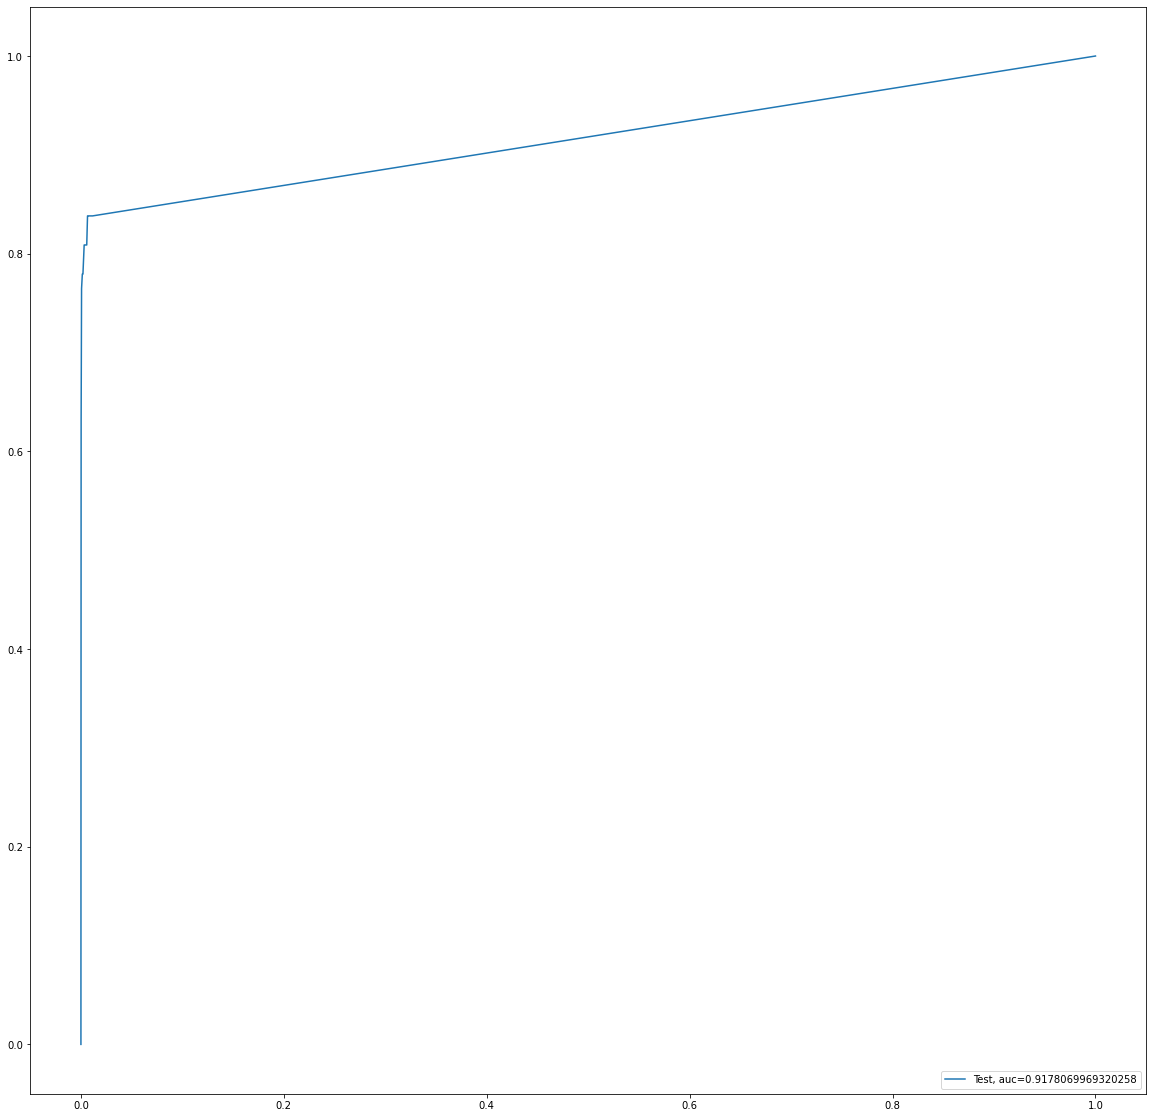

threshold value = 0.02


In [103]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = dt_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

### Random Forest

In [42]:
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                            param_grid = {'n_estimators': [100,150,200],
                                          'min_samples_leaf': [1,5,10],
                                          'max_features': ['auto','sqrt','log2']}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_train_cv, y_train_cv)

#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 122.6min finished


Best score: 0.9693218051147671
Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 200}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,158.167784,5.596234,0.496339,0.036140,auto,1,100,"{'max_features': 'auto', 'min_samples_leaf': 1...",0.944027,0.953983,0.944145,0.981042,0.943749,0.953389,0.014360,22,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
1,230.276815,8.581096,0.734203,0.095276,auto,1,150,"{'max_features': 'auto', 'min_samples_leaf': 1...",0.952757,0.944584,0.943618,0.981161,0.943315,0.953087,0.014462,24,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
2,307.001503,11.627008,0.971647,0.089136,auto,1,200,"{'max_features': 'auto', 'min_samples_leaf': 1...",0.943395,0.953341,0.961458,0.980934,0.961057,0.960037,0.012341,18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
3,152.986572,2.269055,0.468641,0.017113,auto,5,100,"{'max_features': 'auto', 'min_samples_leaf': 5...",0.958542,0.959210,0.958638,0.980256,0.950629,0.961455,0.009921,14,0.999942,0.999944,0.999956,0.999941,0.999949,0.999946,5.554677e-06
4,225.512047,5.344285,0.727955,0.066717,auto,5,150,"{'max_features': 'auto', 'min_samples_leaf': 5...",0.949293,0.957942,0.949107,0.979861,0.950157,0.957272,0.011762,20,0.999944,0.999943,0.999950,0.999940,0.999946,0.999945,3.422836e-06
5,301.291149,10.119262,0.912286,0.095072,auto,5,200,"{'max_features': 'auto', 'min_samples_leaf': 5...",0.967769,0.976250,0.948896,0.979423,0.949352,0.964338,0.012994,8,0.999946,0.999943,0.999951,0.999940,0.999945,0.999945,3.577972e-06
6,148.183691,5.317033,0.493635,0.035069,auto,10,100,"{'max_features': 'auto', 'min_samples_leaf': 1...",0.965747,0.967117,0.959004,0.979333,0.955579,0.965356,0.008180,6,0.999875,0.999871,0.999868,0.999859,0.999867,0.999868,5.191215e-06
7,226.984092,6.400406,0.706644,0.039982,auto,10,150,"{'max_features': 'auto', 'min_samples_leaf': 1...",0.971848,0.967048,0.957782,0.978827,0.956124,0.966326,0.008537,5,0.999876,0.999868,0.999875,0.999862,0.999873,0.999871,5.206635e-06
8,293.637506,7.762828,0.887293,0.037492,auto,10,200,"{'max_features': 'auto', 'min_samples_leaf': 1...",0.982165,0.975880,0.955630,0.978365,0.946045,0.967617,0.014174,2,0.999877,0.999872,0.999874,0.999865,0.999877,0.999873,4.493068e-06
9,151.984763,4.784768,0.474499,0.021601,sqrt,1,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.953075,0.971771,0.943969,0.981005,0.934786,0.956921,0.017164,21,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00


In [43]:
# building the model with the hyperparameters obtained from the gridsearch and training it
rf_model = RandomForestClassifier(n_estimators=200, min_samples_leaf=10, max_features = 'sqrt')
rf_model.fit(X_train_cv,y_train_cv)
#making predictions and calculating the score for train and test sets
y_train_pred = rf_model.predict(X_train_cv)
print('train score =',roc_auc_score(y_true=y_train_cv, y_score=y_train_pred))
y_test_pred = rf_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.8930876785378792
test score = 0.8455379890877062


ROC for the test dataset 97.8%


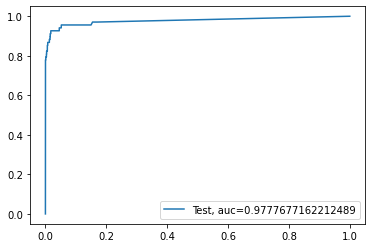

threshold value = 0.004484290792340328


In [44]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = rf_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

### XGBoost

In [123]:
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator = XGBClassifier(),
                            param_grid = {'learning_rate': [0.3, 0.6, 0.9], 
                                          'subsample': [0.5, 1]}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_train_cv, y_train_cv)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 17.5min finished


[00:12:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best score: 0.9806600617392375
Best parameters: {'learning_rate': 0.3, 'subsample': 1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,155.439578,6.280830,0.331894,0.049112,0.3,0.5,"{'learning_rate': 0.3, 'subsample': 0.5}",0.967507,0.970756,0.976228,0.976140,0.967455,0.971617,0.003916,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,205.375902,6.569129,0.307018,0.041904,0.3,1,"{'learning_rate': 0.3, 'subsample': 1}",0.984244,0.985125,0.964186,0.990073,0.979673,0.980660,0.008874,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,125.100623,2.859177,0.324213,0.030737,0.6,0.5,"{'learning_rate': 0.6, 'subsample': 0.5}",0.956679,0.965216,0.966235,0.986467,0.970403,0.969000,0.009806,6,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,143.485168,11.081701,0.263631,0.075076,0.6,1,"{'learning_rate': 0.6, 'subsample': 1}",0.974122,0.984271,0.973488,0.981156,0.963910,0.975389,0.007059,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,63.408289,6.700269,0.156749,0.012068,0.9,0.5,"{'learning_rate': 0.9, 'subsample': 0.5}",0.974614,0.983880,0.961310,0.976426,0.955834,0.970413,0.010301,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,53.425544,8.070000,0.135555,0.058914,0.9,1,"{'learning_rate': 0.9, 'subsample': 1}",0.953195,0.975360,0.967842,0.989226,0.971450,0.971414,0.011641,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [124]:
# building the model with the hyperparameters obtained from the gridsearch and training it
xgb_model = XGBClassifier(learning_rate = 0.3, subsample = 1)
xgb_model.fit(X_train_cv,y_train_cv)
#making predictions and calculating the score for train and test sets
y_train_pred = xgb_model.predict(X_train_cv)
print('train score =',roc_auc_score(y_true=y_train_cv, y_score=y_train_pred))
y_test_pred = xgb_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

[00:13:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train score = 1.0
test score = 0.8749874384483972


ROC for the test dataset 98.0%


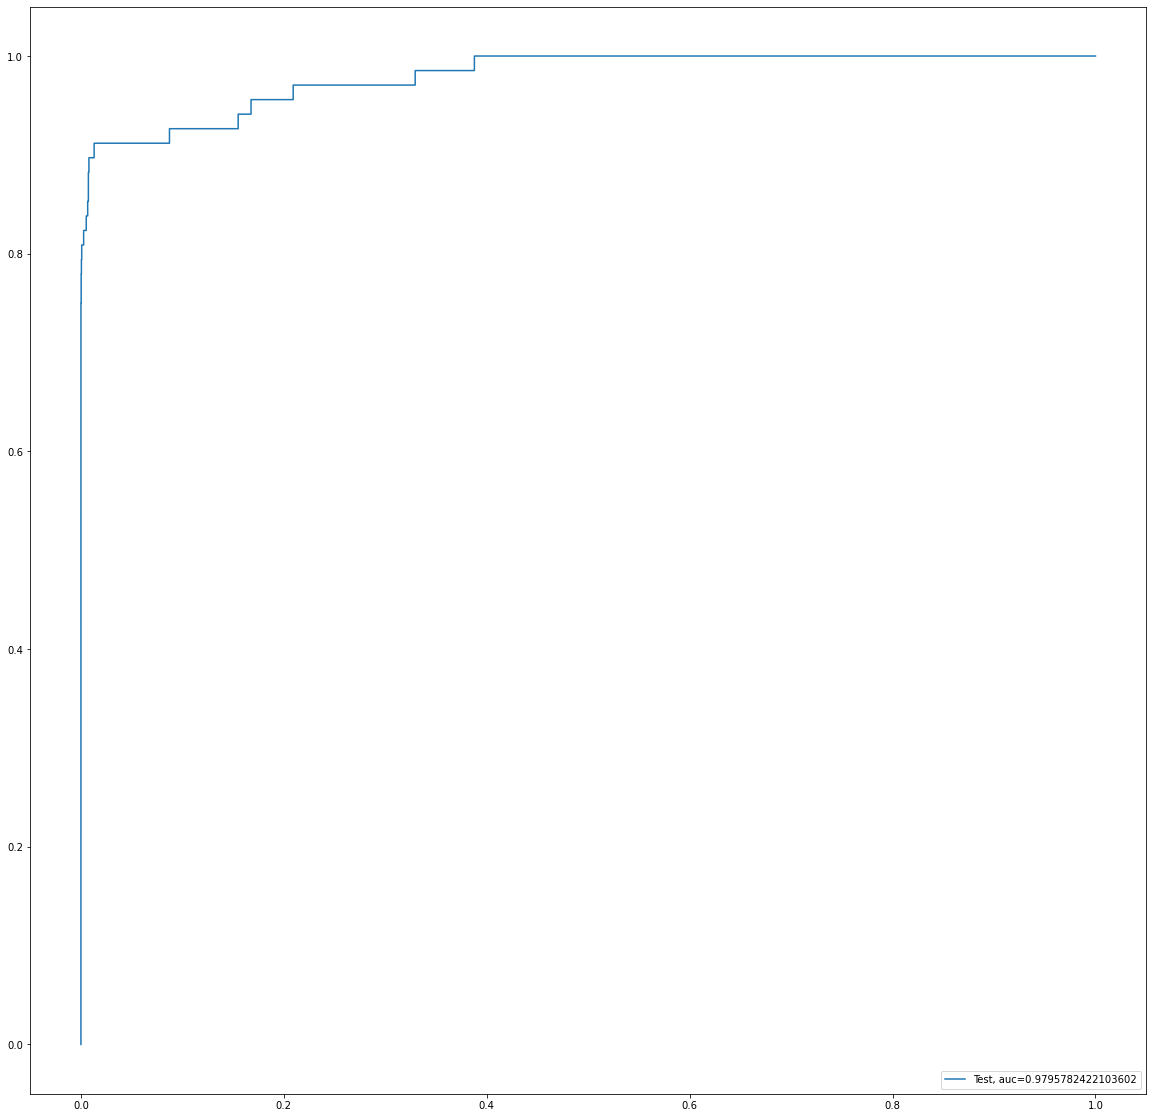

threshold value = 0.00019293942


In [125]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = xgb_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

#### From all the above models fit on the power transformed dataset, XGBoost model has the highest test score as well as the max AUC.

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [126]:
clf = XGBClassifier(learning_rate = 0.3, subsample = 1)#initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
print('Test score =',roc_auc_score(y_true=y_test, y_score=y_test_pred))#print the evaluation score on the X_test by choosing the best evaluation metric

[00:15:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test score = 0.8884666174469211


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 18
2nd Top var = 15
3rd Top var = 11


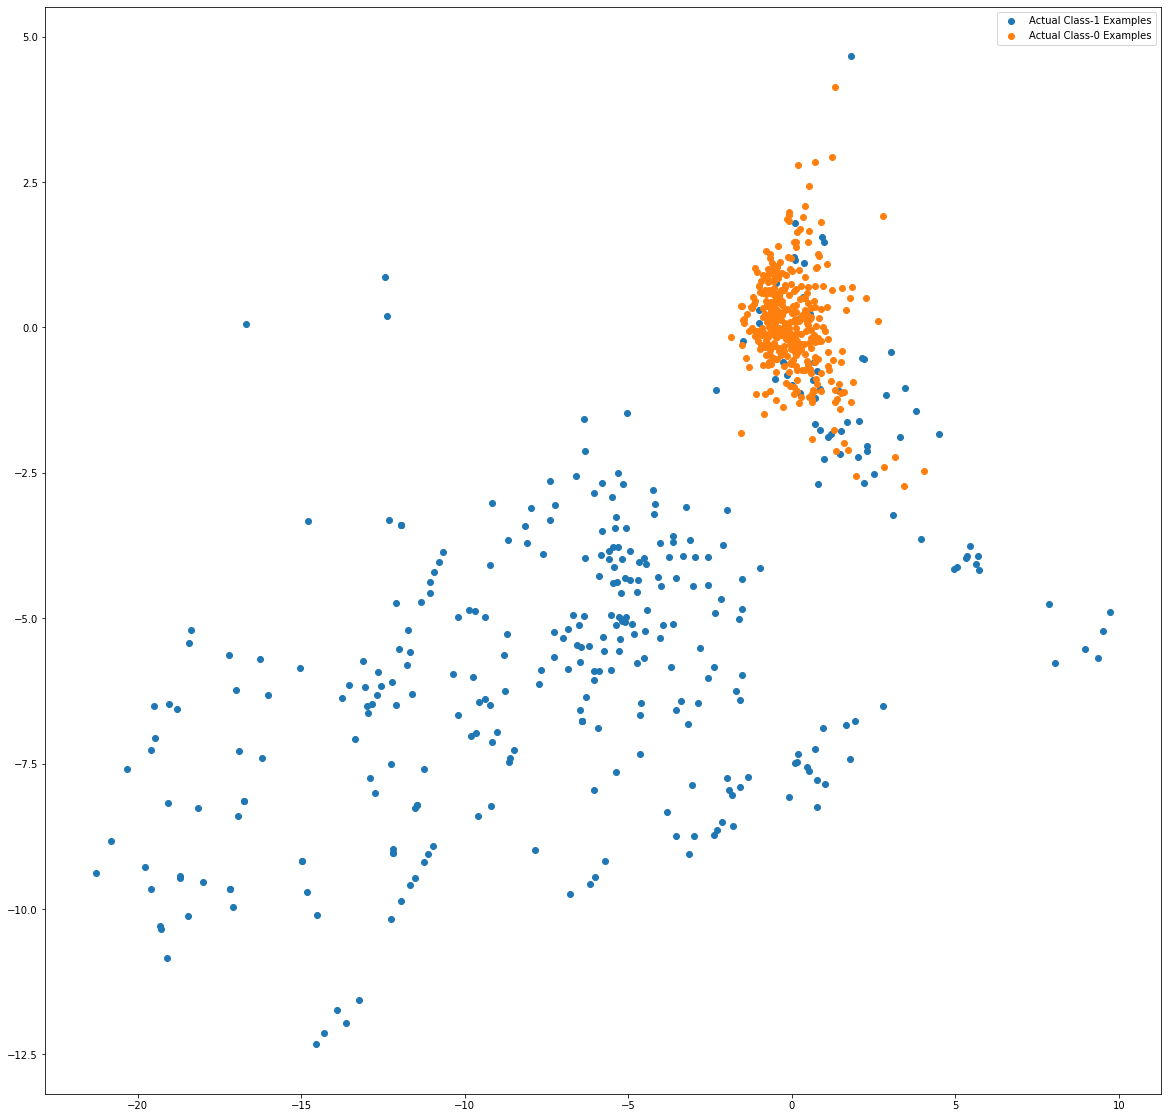

In [49]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [50]:
# Logistic Regression
num_C = [0.1,1,10,100]
cv_num = 5  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [109]:
from imblearn.over_sampling import RandomOverSampler #- import the packages
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
oversampling = RandomOverSampler(sampling_strategy='minority')
X_random, y_random = oversampling.fit_resample(X_train_cv, y_train_cv)

### Logistic regression

In [104]:
#performing hyperparameter tuning for model with L2 regression
grid_search = GridSearchCV(estimator = linear_model.LogisticRegression(),
                            param_grid = {'C': num_C}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_random, y_random)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.2min finished


Best score: 0.9890019013719049
Best parameters: {'C': 10}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,33.908194,15.973819,0.056702,0.004113,0.001,{'C': 0.001},0.988807,0.988605,0.987814,0.988433,0.988298,0.988391,0.000335,5,0.988355,0.988363,0.988522,0.988397,0.988399,0.988407,0.000060
1,2.539116,0.054830,0.052832,0.008466,0.01,{'C': 0.01},0.989249,0.989144,0.988358,0.988926,0.988863,0.988908,0.000309,4,0.988883,0.988865,0.989048,0.988915,0.988908,0.988924,0.000065
2,2.820179,0.095501,0.054276,0.014562,0.1,{'C': 0.1},0.989322,0.989233,0.988448,0.988992,0.988967,0.988993,0.000305,3,0.988972,0.988954,0.989139,0.989006,0.988995,0.989013,0.000065
3,3.229049,0.548568,0.058888,0.023869,1,{'C': 1},0.989331,0.989246,0.988454,0.988994,0.988978,0.989001,0.000306,2,0.988981,0.988963,0.989148,0.989017,0.989003,0.989022,0.000065
4,2.768771,0.336087,0.039144,0.006669,10,{'C': 10},0.989332,0.989249,0.988455,0.988995,0.988978,0.989002,0.000306,1,0.988982,0.988964,0.989149,0.989018,0.989005,0.989024,0.000065


In [105]:
# building the model with the hyperparameters obtained from the gridsearch and training it
lr_model = linear_model.LogisticRegression(C=10)
lr_model.fit(X_random, y_random)
#making predictions and calculating the score for train and test sets
y_random_pred = lr_model.predict(X_random)
print('train score =',roc_auc_score(y_true=y_random, y_score=y_random_pred))
y_test_pred = lr_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.9526837754999499
test score = 0.9378144082474714


ROC for the test dataset 97.9%


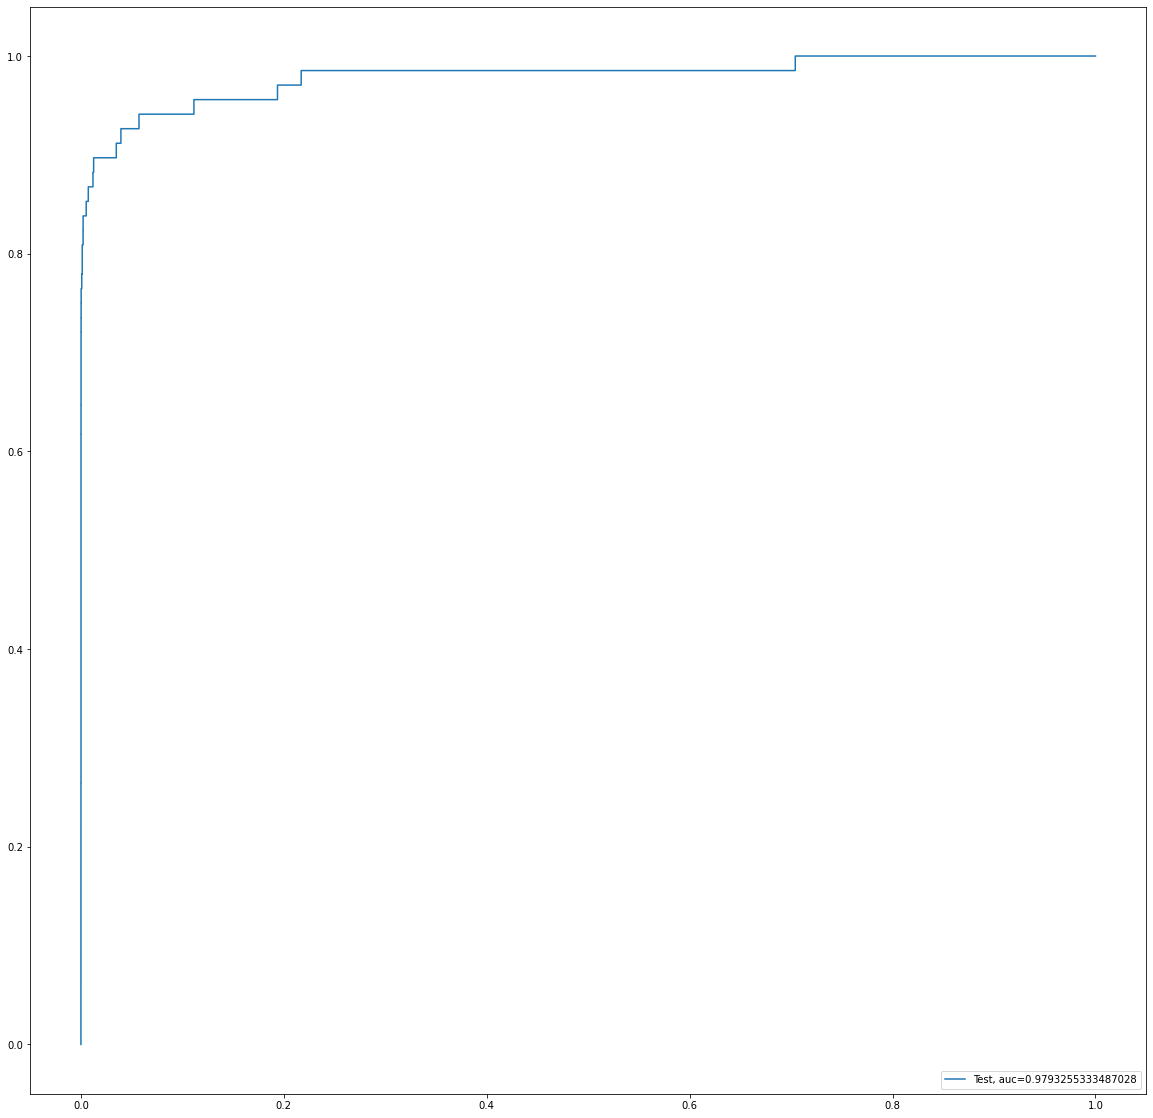

threshold value = 0.35150843678059224


In [106]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = lr_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

In [54]:
#performing hyperparameter tuning for model with L1 regression
grid_search = GridSearchCV(estimator = linear_model.LogisticRegression(penalty='l1', solver ='liblinear'),
                            param_grid = {'C': num_C}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_random, y_random)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished


Best score: 0.9889201259675696
Best parameters: {'C': 10}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,13.802845,1.534327,0.111306,0.014698,0.1,{'C': 0.1},0.988780,0.988787,0.988482,0.989130,0.989342,0.988904,0.000300,4,0.989023,0.988928,0.989030,0.988860,0.988792,0.988926,0.000092
1,14.560965,2.479429,0.053113,0.007652,1,{'C': 1},0.988790,0.988803,0.988491,0.989130,0.989353,0.988914,0.000299,3,0.989028,0.988945,0.989042,0.988868,0.988805,0.988937,0.000091
2,11.564174,1.135923,0.059364,0.006248,10,{'C': 10},0.988798,0.988802,0.988497,0.989146,0.989358,0.988920,0.000300,1,0.989036,0.988944,0.989046,0.988885,0.988808,0.988944,0.000090
3,9.947678,0.739874,0.049989,0.022959,100,{'C': 100},0.988794,0.988801,0.988493,0.989140,0.989349,0.988916,0.000298,2,0.989032,0.988944,0.989044,0.988880,0.988801,0.988940,0.000092


In [55]:
# building the model with the hyperparameters obtained from the gridsearch and training it
lr_model = linear_model.LogisticRegression(C=10, penalty='l1', solver ='liblinear')
lr_model.fit(X_random, y_random)
#making predictions and calculating the score for train and test sets
y_random_pred = lr_model.predict(X_random)
print('train score =',roc_auc_score(y_true=y_random, y_score=y_random_pred))
y_test_pred = lr_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.9526963370515527
test score = 0.9379023391086914


ROC for the test dataset 97.9%


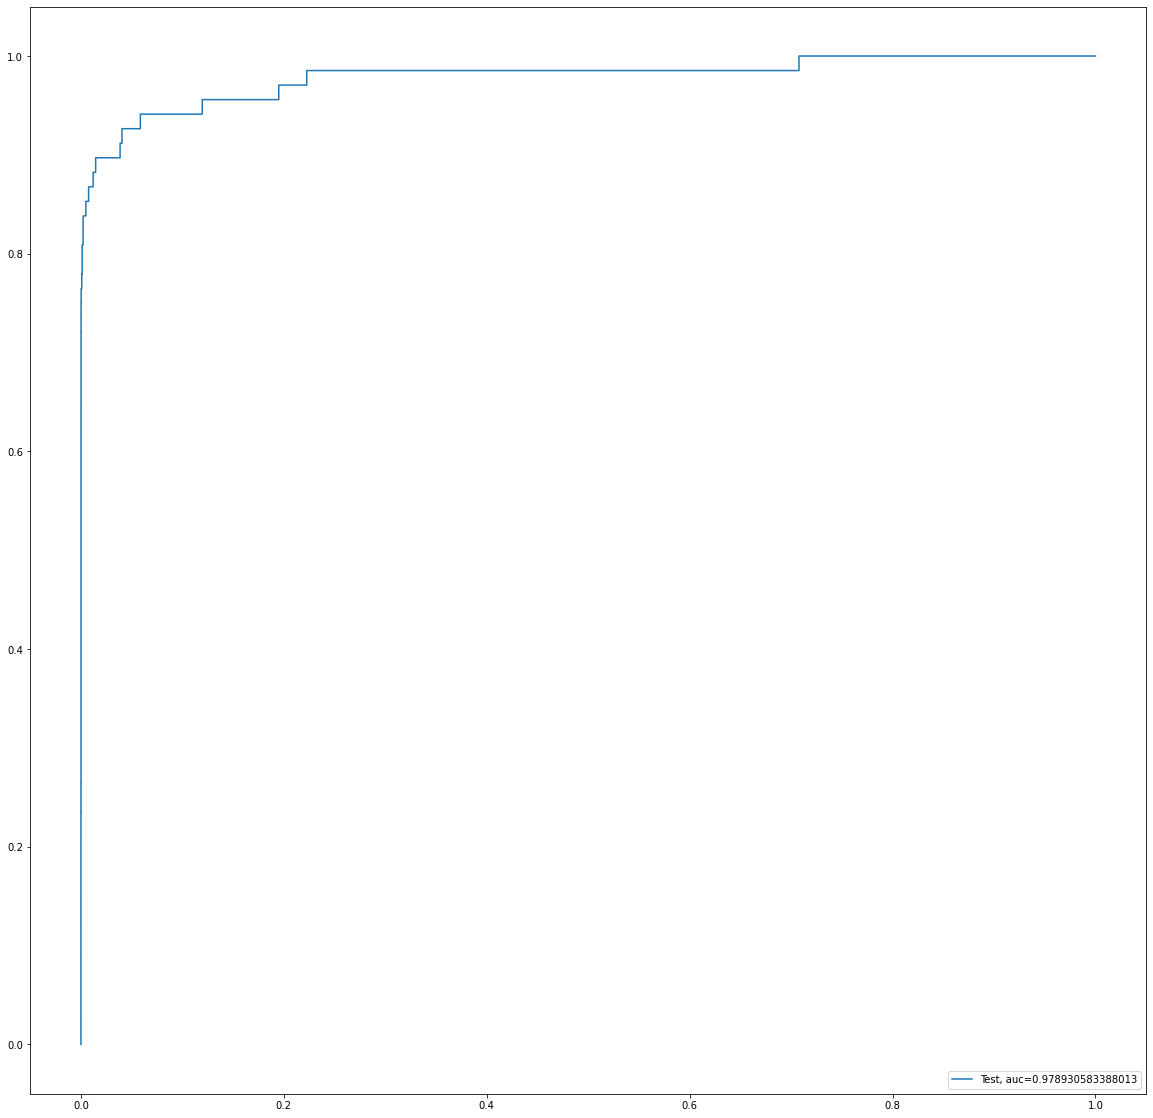

threshold value = 0.3448560133724835


In [56]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = lr_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### KNN

In [57]:
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                            param_grid = {'n_neighbors': [3,5,7]}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_random, y_random)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 115.4min finished


Best score: 0.9998900868179318
Best parameters: {'n_neighbors': 3}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.090328,1.235482,321.937085,4.039290,3,{'n_neighbors': 3},0.999827,0.999921,0.999874,0.999953,0.999874,0.99989,0.000043,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,9.811411,0.459367,375.932931,5.144482,5,{'n_neighbors': 5},0.999827,0.999921,0.999874,0.999953,0.999874,0.99989,0.000043,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,10.216454,0.335404,398.645692,19.870160,7,{'n_neighbors': 7},0.999827,0.999921,0.999874,0.999953,0.999874,0.99989,0.000043,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [58]:
# building the model with the hyperparameters obtained from the gridsearch and training it
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_random,y_random)
#making predictions and calculating the score for train and test sets
y_random_pred = knn_model.predict(X_random)
print('train score =',roc_auc_score(y_true=y_random, y_score=y_random_pred))
y_test_pred = knn_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.99991206913878
test score = 0.860017763511796


ROC for the test dataset 87.5%


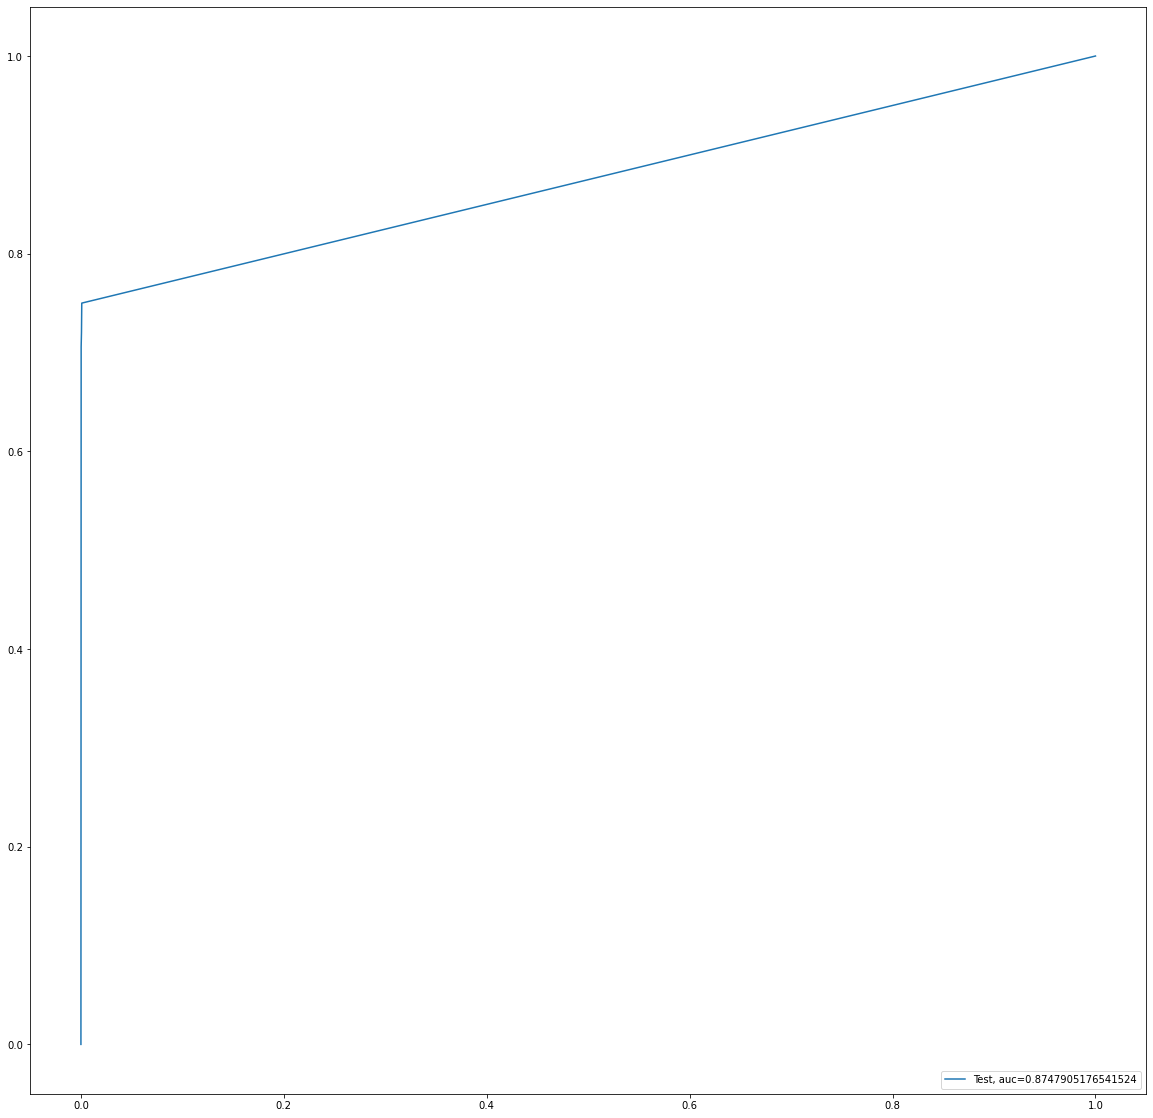

threshold value = 0.3333333333333333


In [59]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = knn_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

### SVM

In [74]:
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator = svm.SVC(),
                            param_grid = {'C':[5, 10]}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_random, y_random)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 97.2min finished


Best score: 0.9997352019824778
Best parameters: {'C': 10}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3178.588094,684.337905,43.721064,8.389846,5,{'C': 5},0.999561,0.999688,0.999673,0.999655,0.999554,0.999627,0.000057,2,0.999668,0.999665,0.999672,0.999693,0.999669,0.999673,0.000010
1,301.145814,18.620519,32.479408,2.443637,10,{'C': 10},0.999704,0.999763,0.999748,0.999721,0.999740,0.999735,0.000021,1,0.999779,0.999790,0.999805,0.999803,0.999774,0.999790,0.000013


In [77]:
# building the model with the hyperparameters obtained from the gridsearch and training it
svm_model = svm.SVC(C = 10, probability = True)
svm_model.fit(X_random,y_random)
#making predictions and calculating the score for train and test sets
y_random_pred = svm_model.predict(X_random)
print('train score =',roc_auc_score(y_true=y_random, y_score=y_random_pred))
y_test_pred = svm_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.9978582554517135
test score = 0.8655241566026471


ROC for the test dataset 88.0%


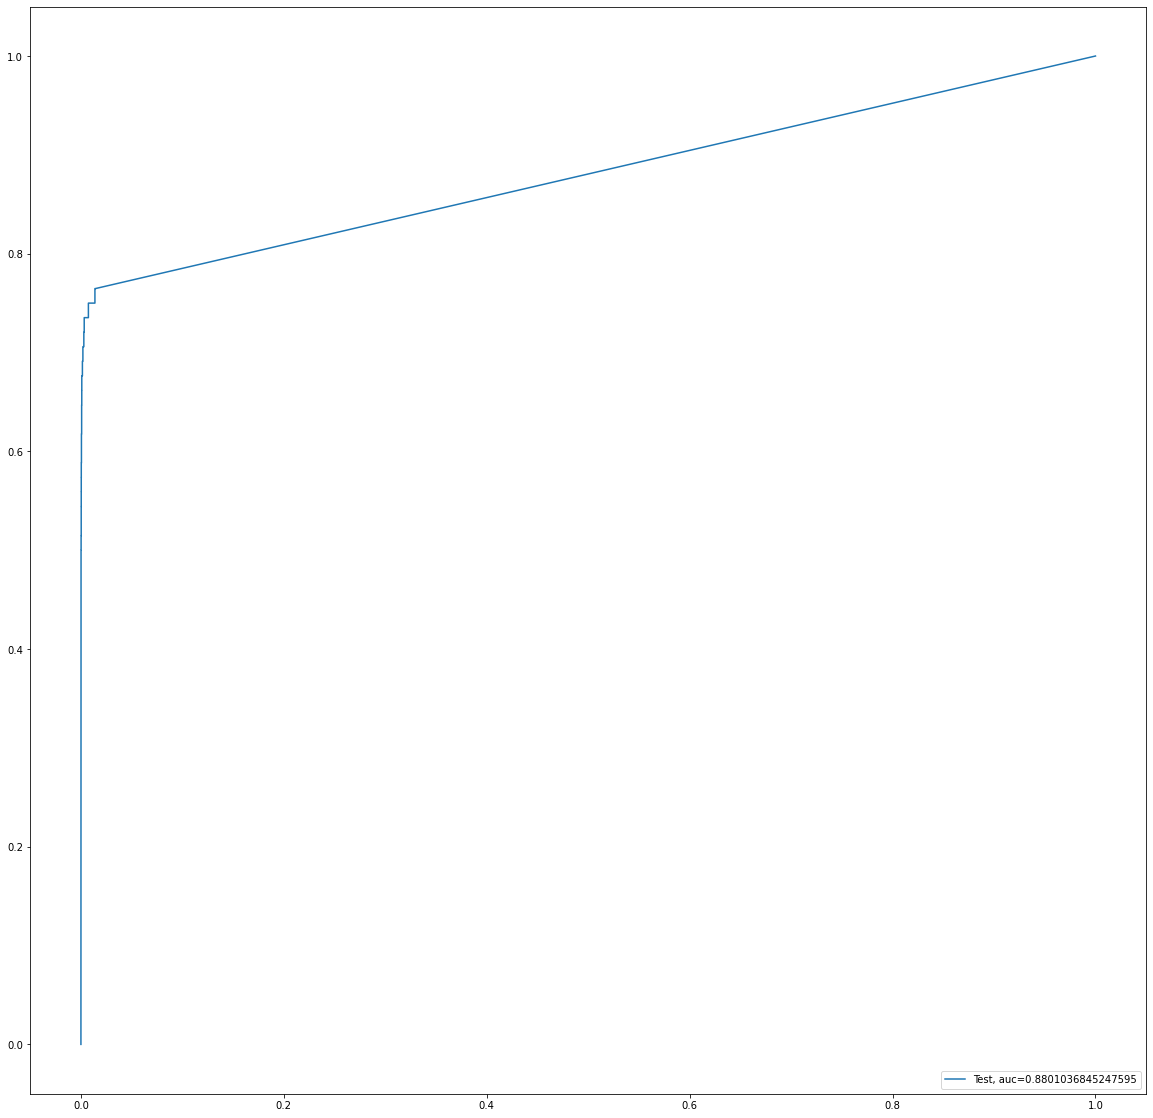

threshold value = 1.316962681374604e-07


In [78]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = svm_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

### Decision Tree

In [112]:
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(),
                            param_grid = {'criterion':['gini','entropy'],
                                          'min_samples_leaf': [1,10,100],
                                          'min_samples_split': [2, 20, 200] }, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_random, y_random)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  5.9min finished


Best score: 0.999851303642405
Best parameters: {'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 2}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,18.497104,1.342157,0.155927,0.132546,gini,1,2,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.999796,0.999764,0.999780,0.999827,0.999686,0.999771,0.000047,11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
1,19.804014,0.256910,0.080420,0.009231,gini,1,20,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.999812,0.999796,0.999764,0.999827,0.999670,0.999774,0.000056,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
2,19.745569,0.453216,0.084719,0.009597,gini,1,200,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.999780,0.999764,0.999749,0.999812,0.999717,0.999764,0.000031,12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
3,18.079158,0.190961,0.069465,0.006556,gini,10,2,"{'criterion': 'gini', 'min_samples_leaf': 10, ...",0.999883,0.999840,0.999870,0.999789,0.999875,0.999851,0.000034,1,0.999989,0.999992,0.999989,0.999992,0.999992,0.999991,1.286670e-06
4,17.806274,0.234751,0.073044,0.009607,gini,10,20,"{'criterion': 'gini', 'min_samples_leaf': 10, ...",0.999803,0.999858,0.999820,0.999727,0.999873,0.999816,0.000051,8,0.999989,0.999992,0.999989,0.999993,0.999993,0.999991,1.454716e-06
5,17.339197,0.394854,0.078852,0.006958,gini,10,200,"{'criterion': 'gini', 'min_samples_leaf': 10, ...",0.999786,0.999824,0.999838,0.999743,0.999858,0.999810,0.000041,9,0.999989,0.999992,0.999989,0.999993,0.999991,0.999991,1.271982e-06
6,17.021366,0.273502,0.068051,0.005889,gini,100,2,"{'criterion': 'gini', 'min_samples_leaf': 100,...",0.999760,0.999744,0.999641,0.999752,0.999755,0.999731,0.000045,17,0.999901,0.999882,0.999882,0.999897,0.999883,0.999889,8.292991e-06
7,16.012722,1.237486,0.067787,0.023534,gini,100,20,"{'criterion': 'gini', 'min_samples_leaf': 100,...",0.999818,0.999761,0.999690,0.999738,0.999784,0.999758,0.000043,13,0.999901,0.999882,0.999882,0.999897,0.999883,0.999889,8.200962e-06
8,11.179214,1.556832,0.053150,0.014376,gini,100,200,"{'criterion': 'gini', 'min_samples_leaf': 100,...",0.999791,0.999722,0.999656,0.999724,0.999753,0.999729,0.000044,18,0.999905,0.999882,0.999882,0.999897,0.999883,0.999890,9.599990e-06
9,9.902950,0.723567,0.041560,0.002331,entropy,1,2,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.999812,0.999874,0.999843,0.999859,0.999780,0.999834,0.000034,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00


In [113]:
# building the model with the hyperparameters obtained from the gridsearch and training it
dt_model = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf=10, min_samples_split=2)
dt_model.fit(X_random,y_random)
#making predictions and calculating the score for train and test sets
y_random_pred = dt_model.predict(X_random)
print('train score =',roc_auc_score(y_true=y_random, y_score=y_random_pred))
y_test_pred = dt_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.9998178575017586
test score = 0.8304678217382823


ROC for the test dataset 83.1%


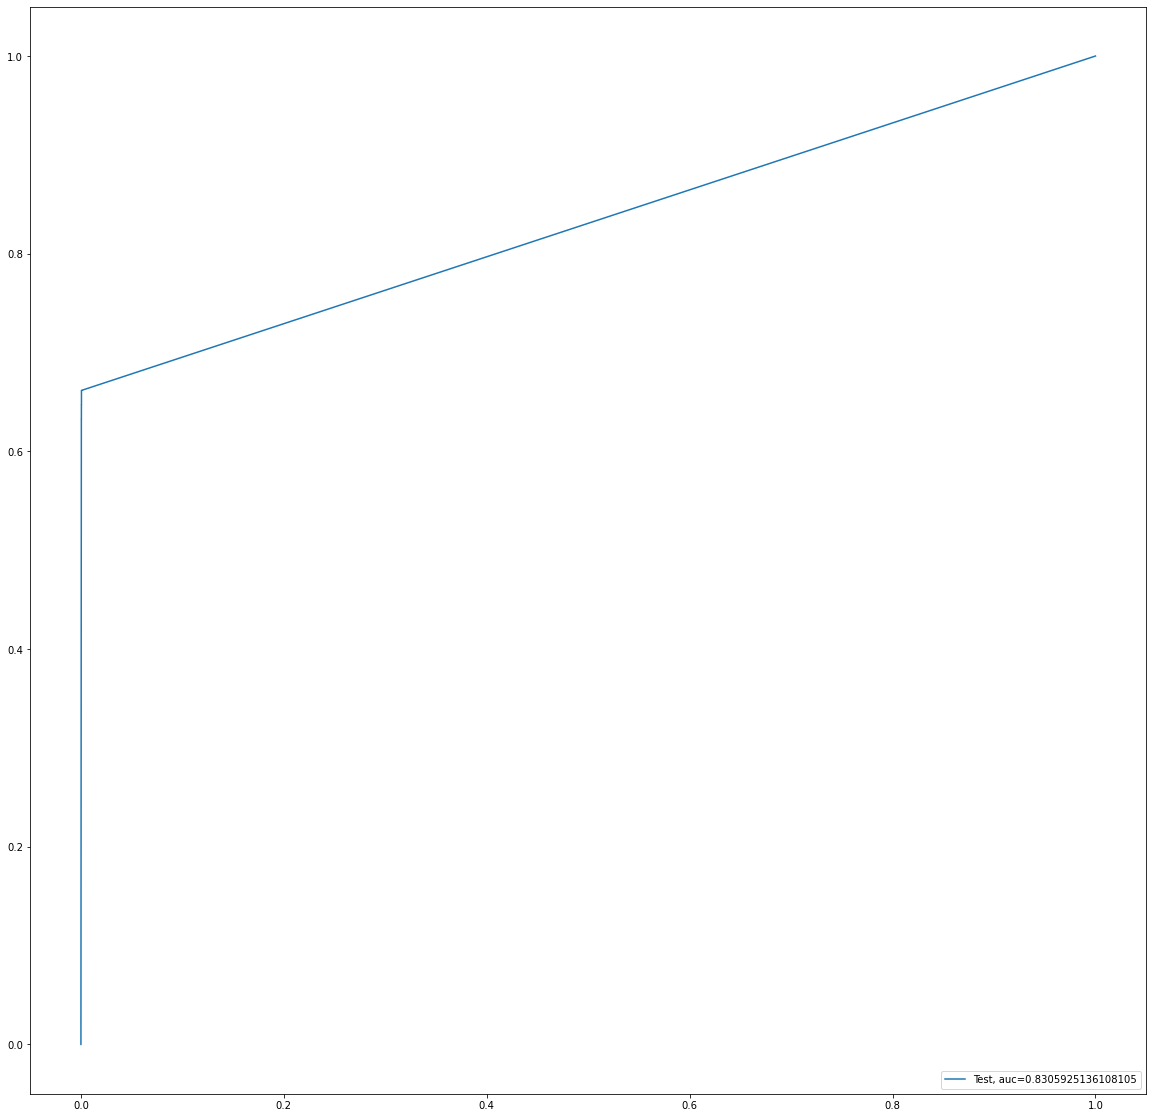

threshold value = 0.9964093357271095


In [114]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = dt_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

### Random Forest

In [18]:
#perform hyperparameter tuning
#since sqrt was the best max_feature in the previous random forest model, repeating it for this model
grid_search = GridSearchCV(estimator = RandomForestClassifier(max_features = 'sqrt'),
                            param_grid = {'n_estimators': [100,150,200],
                                          'min_samples_leaf': [1,5,10]}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_random, y_random)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 95.7min finished


Best score: 1.0
Best parameters: {'min_samples_leaf': 1, 'n_estimators': 100}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,330.967063,5.183590,2.236816,0.130413,1,100,"{'min_samples_leaf': 1, 'n_estimators': 100}",1.0,1.0,1.000000,1.0,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
1,489.788778,5.663641,3.127233,0.137953,1,150,"{'min_samples_leaf': 1, 'n_estimators': 150}",1.0,1.0,1.000000,1.0,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
2,653.914086,7.386014,4.056348,0.110597,1,200,"{'min_samples_leaf': 1, 'n_estimators': 200}",1.0,1.0,1.000000,1.0,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
3,315.182731,3.206606,1.999051,0.120724,5,100,"{'min_samples_leaf': 5, 'n_estimators': 100}",1.0,1.0,1.000000,1.0,0.999988,0.999998,0.000005,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.021667e-17
4,469.137220,2.256966,2.889469,0.016222,5,150,"{'min_samples_leaf': 5, 'n_estimators': 150}",1.0,1.0,0.999976,1.0,1.000000,0.999995,0.000010,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.110223e-16
5,630.429899,7.641114,4.040188,0.163355,5,200,"{'min_samples_leaf': 5, 'n_estimators': 200}",1.0,1.0,0.999980,1.0,1.000000,0.999996,0.000008,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.965068e-17
6,310.323733,3.753439,2.019996,0.045754,10,100,"{'min_samples_leaf': 10, 'n_estimators': 100}",1.0,1.0,0.999970,1.0,0.999991,0.999992,0.000012,9,0.999998,0.999998,0.999999,0.999999,0.999999,0.999999,4.738605e-07
7,462.327242,2.732040,3.160544,0.146510,10,150,"{'min_samples_leaf': 10, 'n_estimators': 150}",1.0,1.0,0.999983,1.0,0.999988,0.999994,0.000007,8,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000,4.857076e-07
8,572.448464,56.801286,3.352027,0.561941,10,200,"{'min_samples_leaf': 10, 'n_estimators': 200}",1.0,1.0,0.999986,1.0,0.999988,0.999995,0.000006,7,0.999999,0.999999,1.000000,0.999999,0.999999,0.999999,4.329763e-07


In [20]:
# building the model with the hyperparameters obtained from the gridsearch and training it
rf_model = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, max_features='sqrt')
rf_model.fit(X_random,y_random)
#making predictions and calculating the score for train and test sets
y_random_pred = rf_model.predict(X_random)
print('train score =',roc_auc_score(y_true=y_random, y_score=y_random_pred))
y_test_pred = rf_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 1.0
test score = 0.8602438714406474


ROC for the test dataset 93.9%


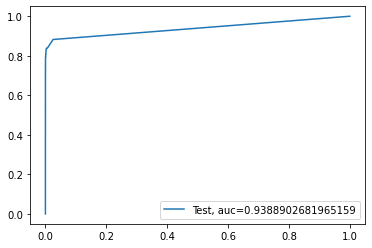

threshold value = 0.01


In [21]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = rf_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

### XGBoost

In [120]:
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator = XGBClassifier(),
                            param_grid = {'learning_rate': [0.3, 0.6, 0.9], 
                                          'subsample': [0.5, 1]}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_random, y_random)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 36.3min finished


[23:48:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best score: 0.9999898582604965
Best parameters: {'learning_rate': 0.3, 'subsample': 0.5}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,324.102528,1.524487,2.996096,1.518017,0.3,0.5,"{'learning_rate': 0.3, 'subsample': 0.5}",1.0,0.999998,0.999957,1.000000,0.999994,0.999990,0.000016,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,366.908024,5.066927,0.736866,0.172696,0.3,1,"{'learning_rate': 0.3, 'subsample': 1}",1.0,1.000000,0.999960,1.000000,0.999976,0.999987,0.000017,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,245.321167,1.956381,0.650883,0.070112,0.6,0.5,"{'learning_rate': 0.6, 'subsample': 0.5}",1.0,0.999992,0.999960,1.000000,0.999980,0.999986,0.000015,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,277.011989,3.023365,0.636354,0.097608,0.6,1,"{'learning_rate': 0.6, 'subsample': 1}",1.0,1.000000,0.999970,1.000000,0.999969,0.999988,0.000015,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,209.927802,3.788200,0.549491,0.045895,0.9,0.5,"{'learning_rate': 0.9, 'subsample': 0.5}",1.0,1.000000,0.999967,0.999991,0.999970,0.999986,0.000014,6,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,196.822969,25.541304,0.419096,0.123123,0.9,1,"{'learning_rate': 0.9, 'subsample': 1}",1.0,1.000000,0.999955,1.000000,0.999987,0.999988,0.000017,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [121]:
# building the model with the hyperparameters obtained from the gridsearch and training it
xgb_model = XGBClassifier(learning_rate = 0.3, subsample = 0.5)
xgb_model.fit(X_random,y_random)
#making predictions and calculating the score for train and test sets
y_random_pred = xgb_model.predict(X_random)
print('train score =',roc_auc_score(y_true=y_random, y_score=y_random_pred))
y_test_pred = xgb_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

[23:51:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train score = 0.9999968596120993
test score = 0.8675716895139123


ROC for the test dataset 97.4%


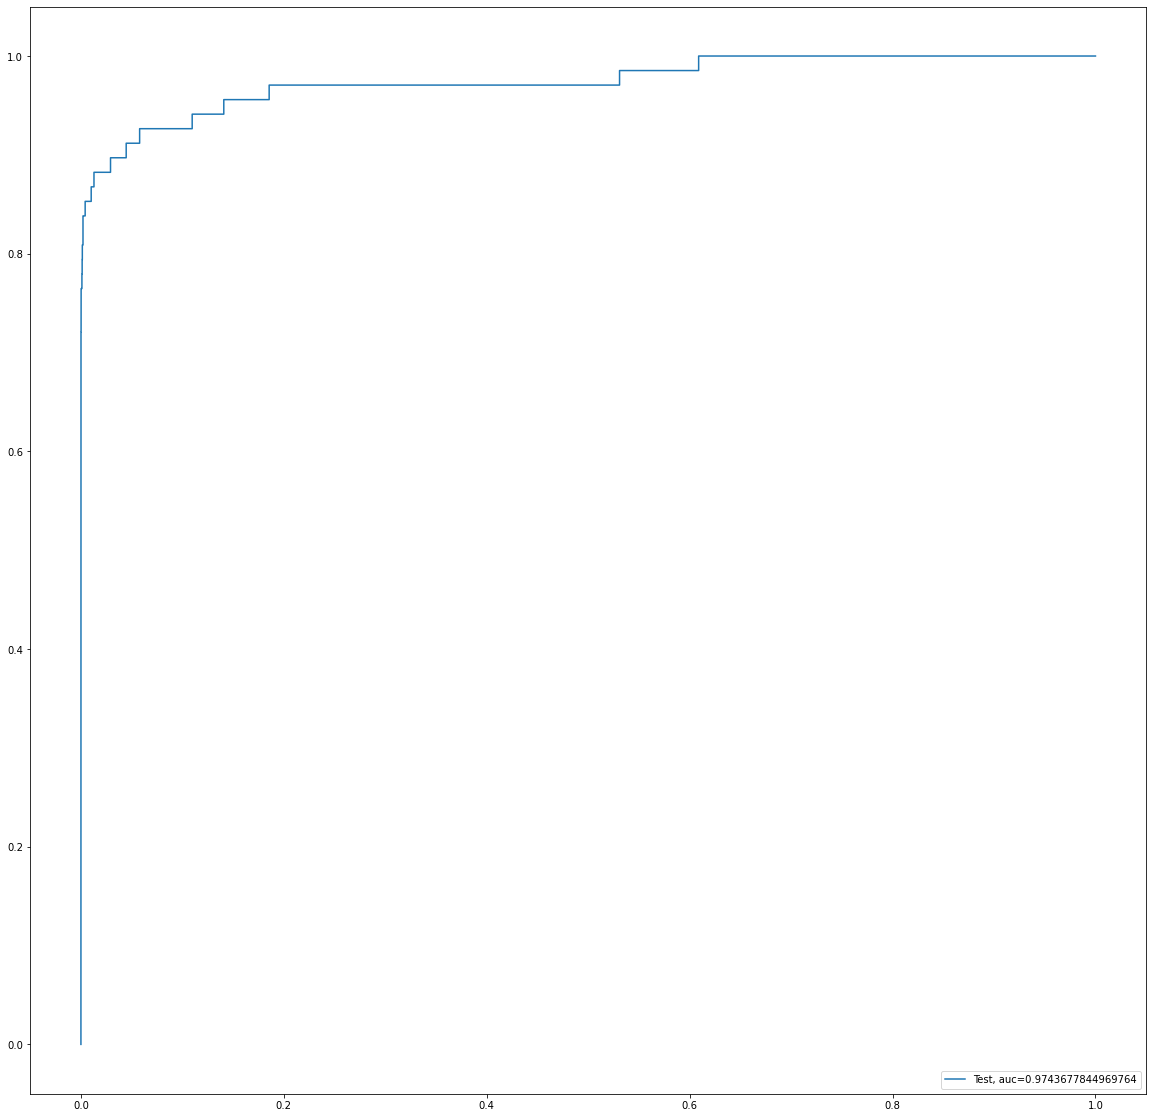

threshold value = 0.0003072254


In [122]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = xgb_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

#### From all the above models fit on Randomly oversampled data, it is the logistic regression models that have the highest test scores and max AUC  

### Print the class distribution after applying SMOTE 

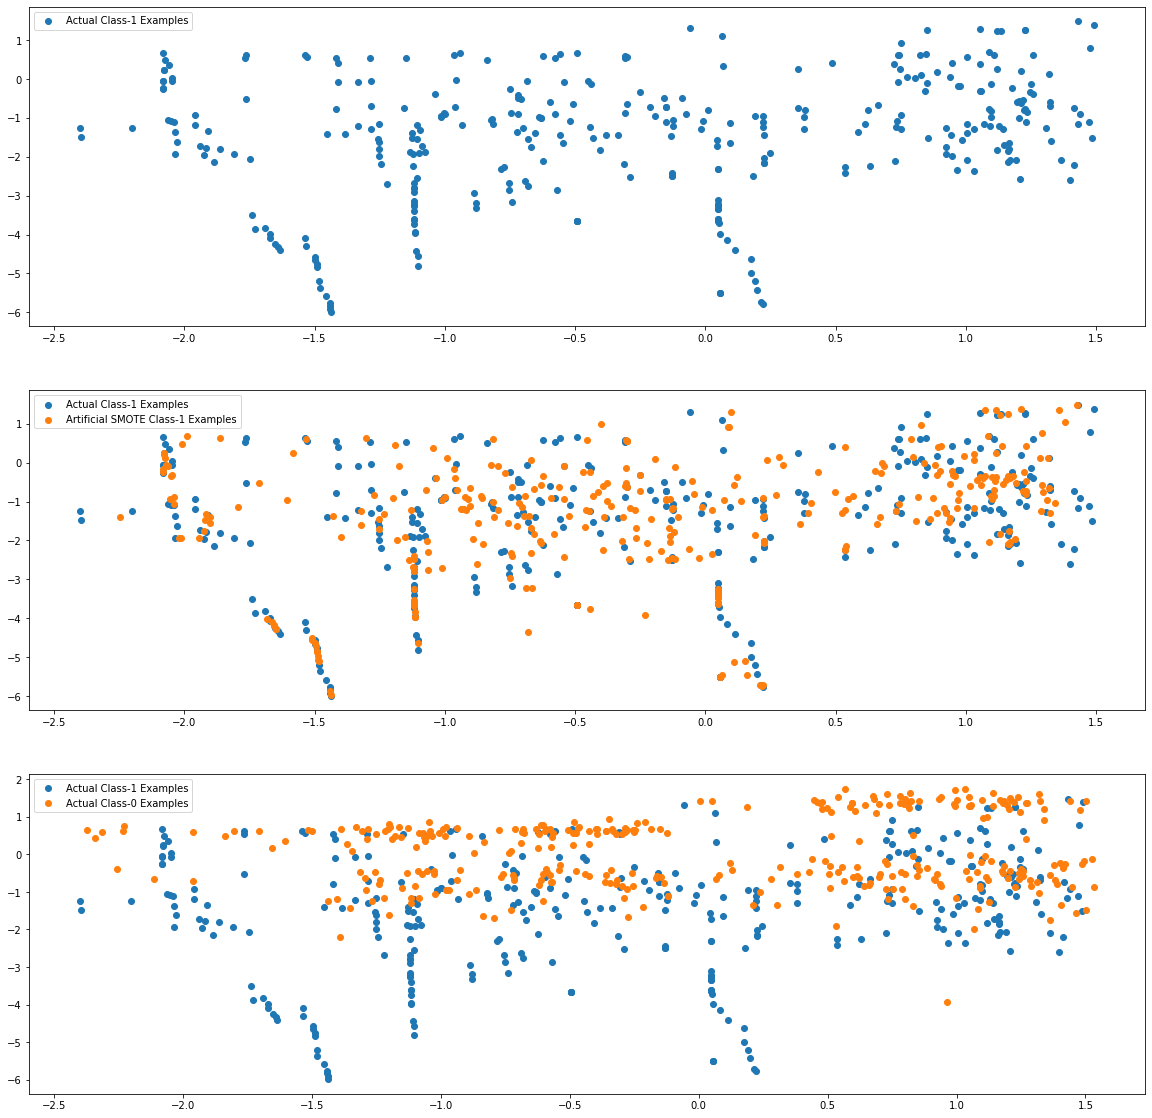

In [100]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()X

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Build models on other algorithms to see the better performing on SMOTE

In [43]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE
X_smote, y_smote = sm.fit_resample(X_train_cv, y_train_cv)

### Logistic regression

In [26]:
#performing hyperparameter tuning for L2 model
grid_search = GridSearchCV(estimator = linear_model.LogisticRegression(),
                            param_grid = {'C': num_C}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_smote, y_smote)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.4min finished


Best score: 0.9910731297652584
Best parameters: {'C': 10}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.983088,3.315228,0.093152,0.016115,0.001,{'C': 0.001},0.990730,0.990716,0.990633,0.990105,0.990650,0.990567,0.000234,5,0.990520,0.990525,0.990529,0.990738,0.990592,0.990581,0.000083
1,4.699228,0.262142,0.196473,0.203189,0.01,{'C': 0.01},0.991202,0.991098,0.991074,0.990535,0.991088,0.990999,0.000237,4,0.990947,0.990977,0.990975,0.991169,0.991013,0.991016,0.000079
2,5.239181,0.312544,0.411499,0.306093,0.1,{'C': 0.1},0.991274,0.991153,0.991129,0.990612,0.991166,0.991067,0.000233,3,0.991016,0.991049,0.991038,0.991234,0.991080,0.991083,0.000078
3,11.367785,3.001895,0.944674,0.429007,1,{'C': 1},0.991281,0.991158,0.991133,0.990619,0.991172,0.991073,0.000233,2,0.991021,0.991056,0.991042,0.991240,0.991086,0.991089,0.000078
4,4.112996,0.737297,0.070412,0.022047,10,{'C': 10},0.991282,0.991158,0.991134,0.990619,0.991173,0.991073,0.000233,1,0.991022,0.991056,0.991042,0.991241,0.991087,0.991090,0.000078


In [27]:
# building the model with the hyperparameters obtained from the gridsearch and training it
lr_model = linear_model.LogisticRegression(C=10)
lr_model.fit(X_smote, y_smote)
#making predictions and calculating the score for train and test sets
y_smote_pred = lr_model.predict(X_smote)
print('train score =',roc_auc_score(y_true=y_smote, y_score=y_smote_pred))
y_test_pred = lr_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.9535819264395539
test score = 0.9295319122523896


ROC for the test dataset 97.6%


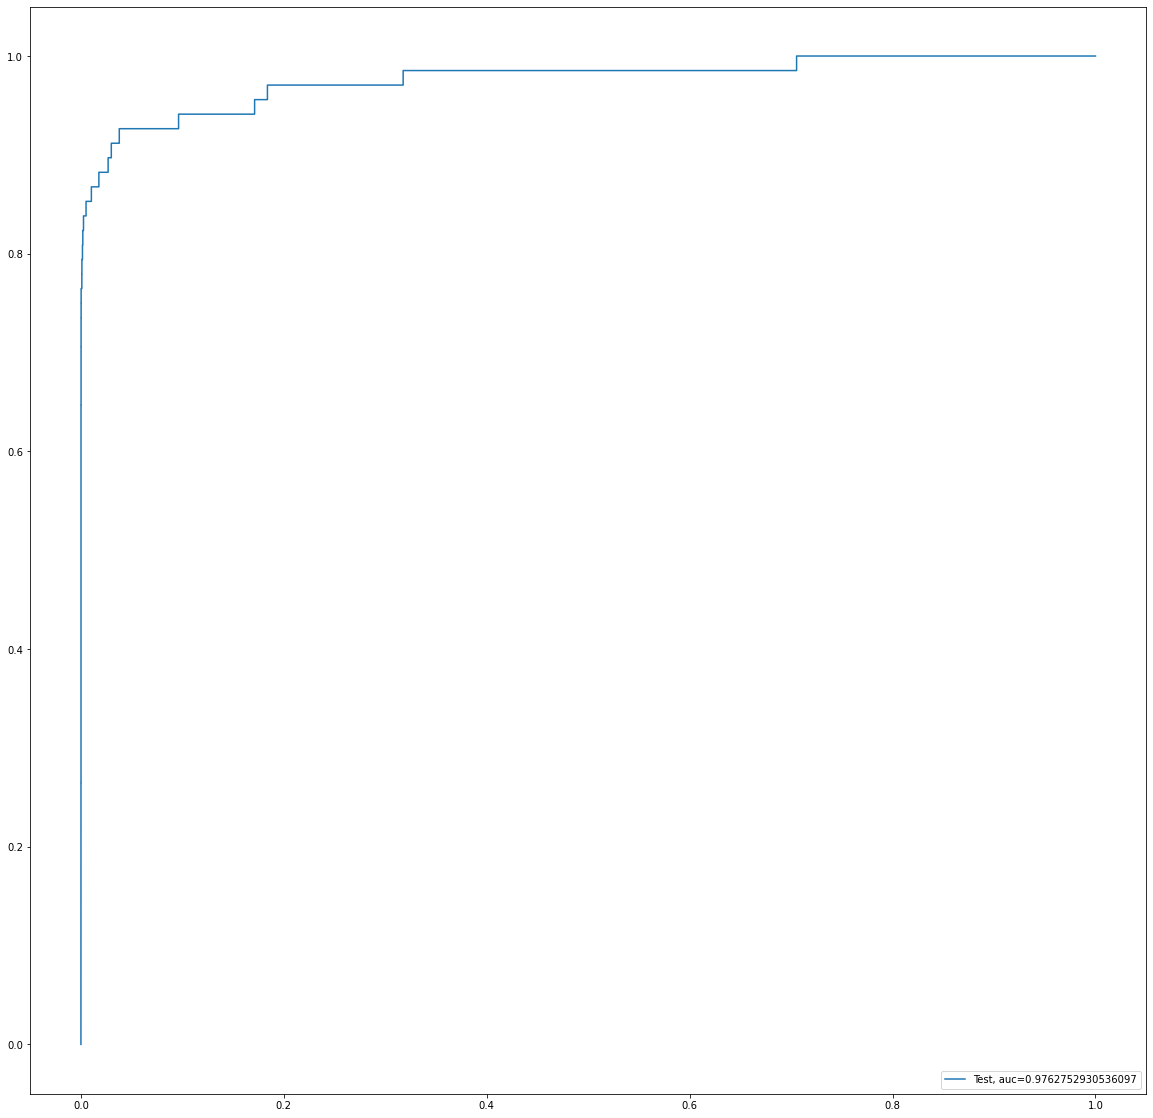

threshold value = 0.36442858962200464


In [28]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = lr_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

In [30]:
#performing hyperparameter tuning for L1 model
grid_search = GridSearchCV(estimator = linear_model.LogisticRegression(penalty='l1', solver ='liblinear'),
                            param_grid = {'C': num_C}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_smote, y_smote)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.5min finished


Best score: 0.9910654640084087
Best parameters: {'C': 10}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,16.697285,6.491023,9.921854,3.805135,0.001,{'C': 0.001},0.990366,0.990370,0.990312,0.989621,0.990302,0.990194,0.000288,5,0.990131,0.990157,0.990174,0.990360,0.990212,0.990207,0.000081
1,17.355622,6.818048,9.176049,7.419539,0.01,{'C': 0.01},0.991107,0.991016,0.990985,0.990428,0.990997,0.990907,0.000243,4,0.990852,0.990885,0.990885,0.991076,0.990922,0.990924,0.000079
2,15.520874,2.047560,0.089959,0.018133,0.1,{'C': 0.1},0.991262,0.991150,0.991122,0.990597,0.991152,0.991057,0.000235,3,0.991003,0.991045,0.991029,0.991223,0.991068,0.991074,0.000078
3,14.243487,0.631141,0.104321,0.018930,1,{'C': 1},0.991270,0.991150,0.991125,0.990607,0.991160,0.991062,0.000233,2,0.991012,0.991046,0.991033,0.991230,0.991074,0.991079,0.000078
4,13.082994,1.008651,0.086769,0.025761,10,{'C': 10},0.991272,0.991152,0.991129,0.990613,0.991160,0.991065,0.000231,1,0.991013,0.991048,0.991038,0.991236,0.991075,0.991082,0.000080


In [32]:
# building a model with the hyperparameters obtained from the gridsearch and training it
lr_model = linear_model.LogisticRegression(C=10, penalty='l1', solver ='liblinear')
lr_model.fit(X_smote, y_smote)
#making predictions and calculating the score for train and test sets
y_smote_pred = lr_model.predict(X_smote)
print('train score =',roc_auc_score(y_true=y_smote, y_score=y_smote_pred))
y_test_pred = lr_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.953578786051653
test score = 0.9295821584588011


ROC for the test dataset 97.6%


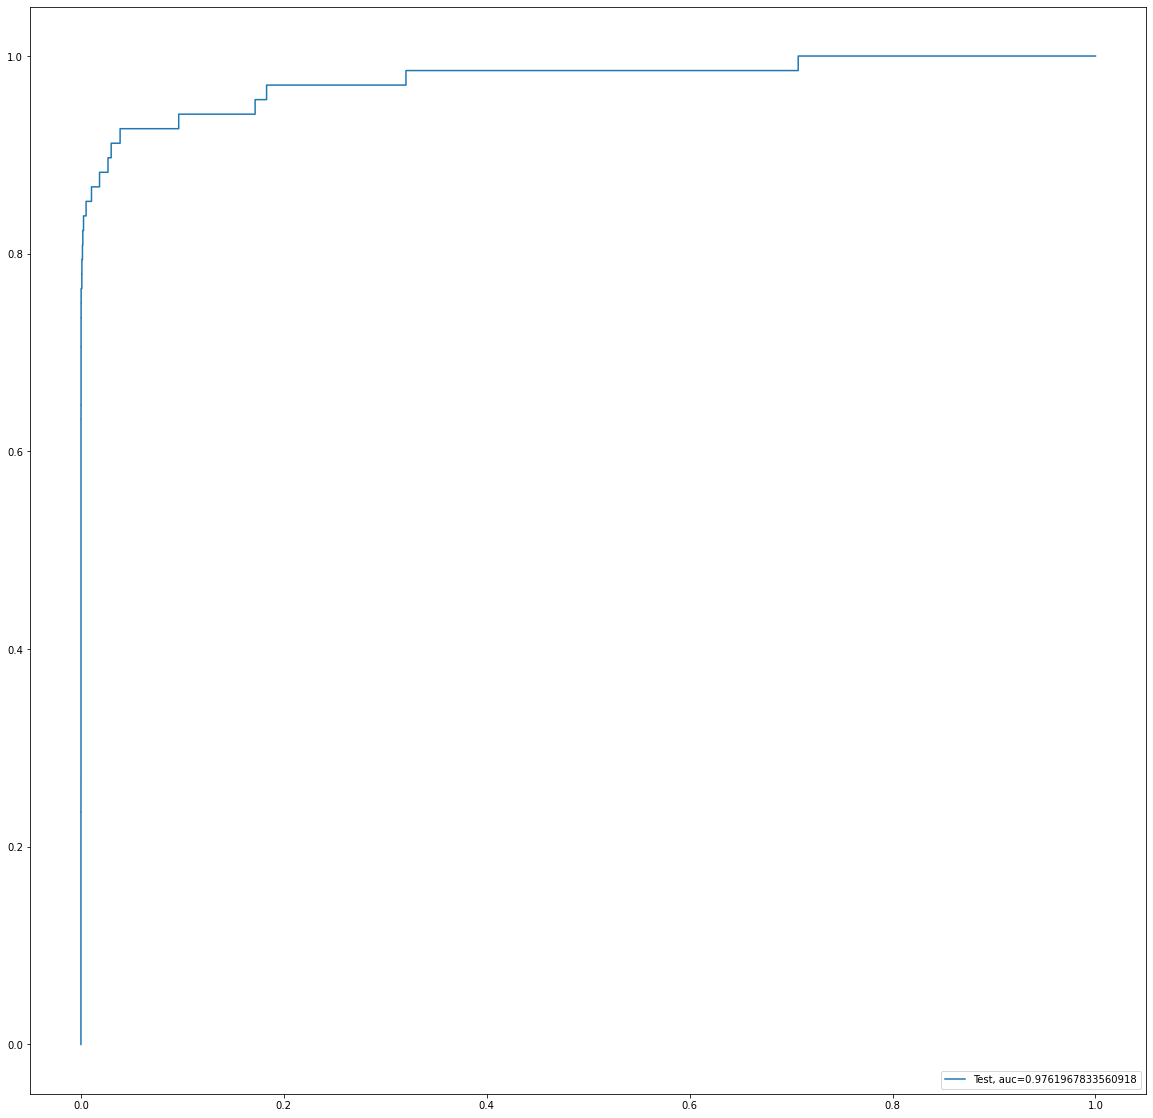

threshold value = 0.3573861374871762


In [33]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = lr_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

### KNN

In [68]:
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                            param_grid = {'n_neighbors': [3,5]}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_smote, y_smote)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 80.3min finished


Best score: 0.9997393478436472
Best parameters: {'n_neighbors': 5}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,14.817718,2.647035,354.080710,12.965763,3,{'n_neighbors': 3},0.999733,0.999717,0.999749,0.999702,0.999749,0.999730,0.000018,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,9.792858,0.177752,381.956458,45.448291,5,{'n_neighbors': 5},0.999733,0.999749,0.999749,0.999702,0.999764,0.999739,0.000021,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [69]:
# building the model with the hyperparameters obtained from the gridsearch and training it
knn_model = KNeighborsClassifier(n_neighbors =5 )
knn_model.fit(X_smote,y_smote)
#making predictions and calculating the score for train and test sets
y_smote_pred = knn_model.predict(X_smote)
print('train score =',roc_auc_score(y_true=y_smote, y_score=y_smote_pred))
y_test_pred = knn_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.9995697668576022
test score = 0.8890024354631814


ROC for the test dataset 90.4%


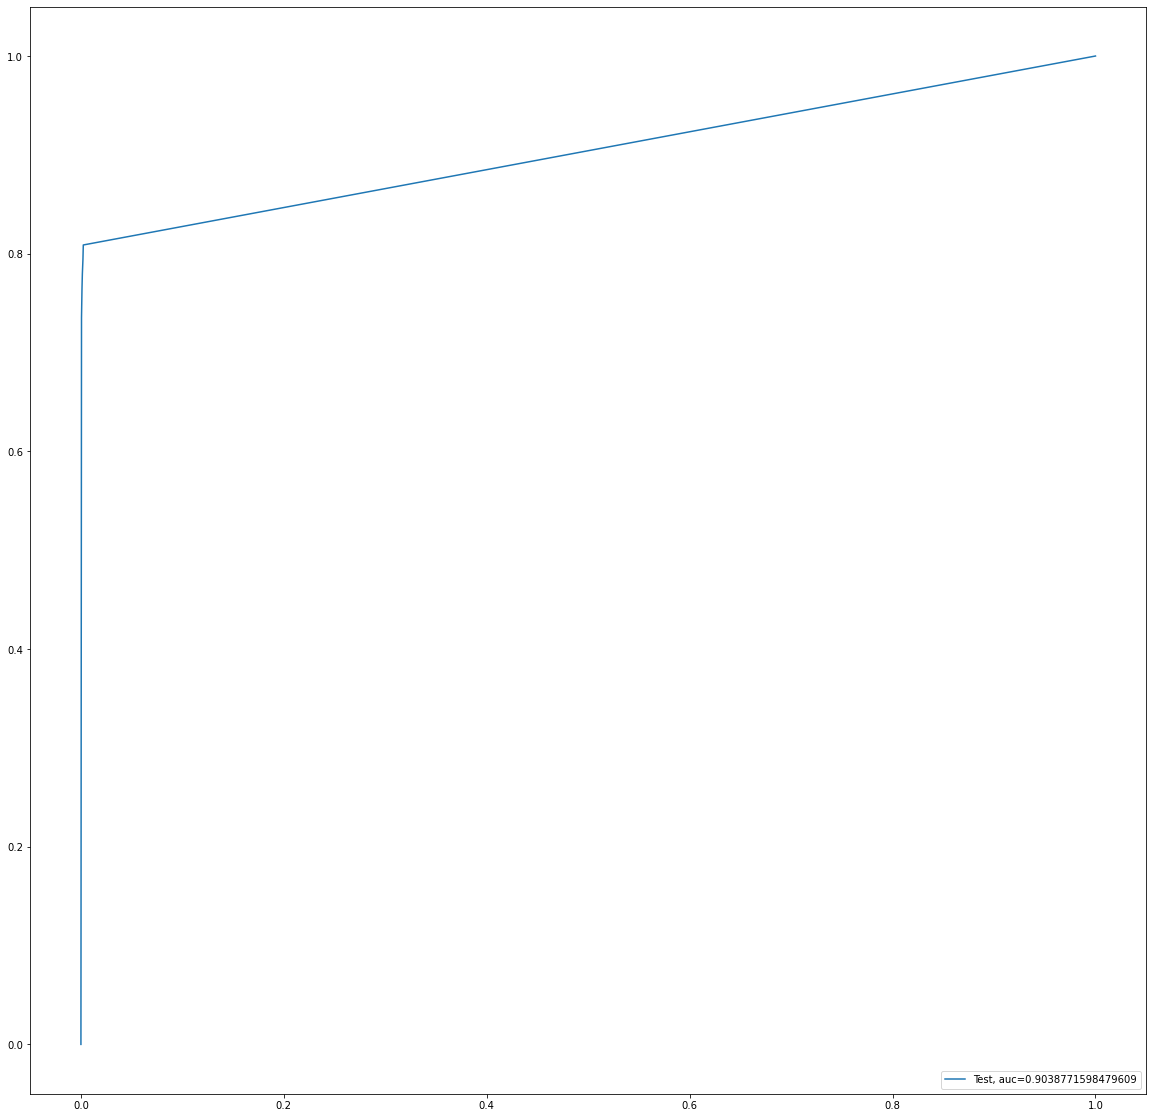

threshold value = 0.2


In [70]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = knn_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

### SVM

In [80]:
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator = svm.SVC(),
                            param_grid = {'C':[5, 10]}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_smote, y_smote)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 25.8min finished


Best score: 0.9999212527827478
Best parameters: {'C': 10}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,389.500389,6.669207,43.239396,0.314417,5,{'C': 5},0.999870,0.999898,0.999884,0.999881,0.999900,0.999887,0.000011,2,0.999905,0.999905,0.999905,0.999912,0.999898,0.999905,0.000004
1,310.735386,37.872723,28.287580,3.505941,10,{'C': 10},0.999921,0.999928,0.999910,0.999914,0.999933,0.999921,0.000008,1,0.999932,0.999946,0.999953,0.999940,0.999932,0.999941,0.000008


In [81]:
# building a model with the hyperparameters obtained from the gridsearch and training it
svm_model = svm.SVC(C = 10, probability = True)
svm_model.fit(X_smote,y_smote)
#making predictions and calculating the score for train and test sets
y_smote_pred = svm_model.predict(X_smote)
print('train score =',roc_auc_score(y_true=y_smote, y_score=y_smote_pred))
y_test_pred = svm_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.998081222992664
test score = 0.8656372105670728


ROC for the test dataset 87.7%


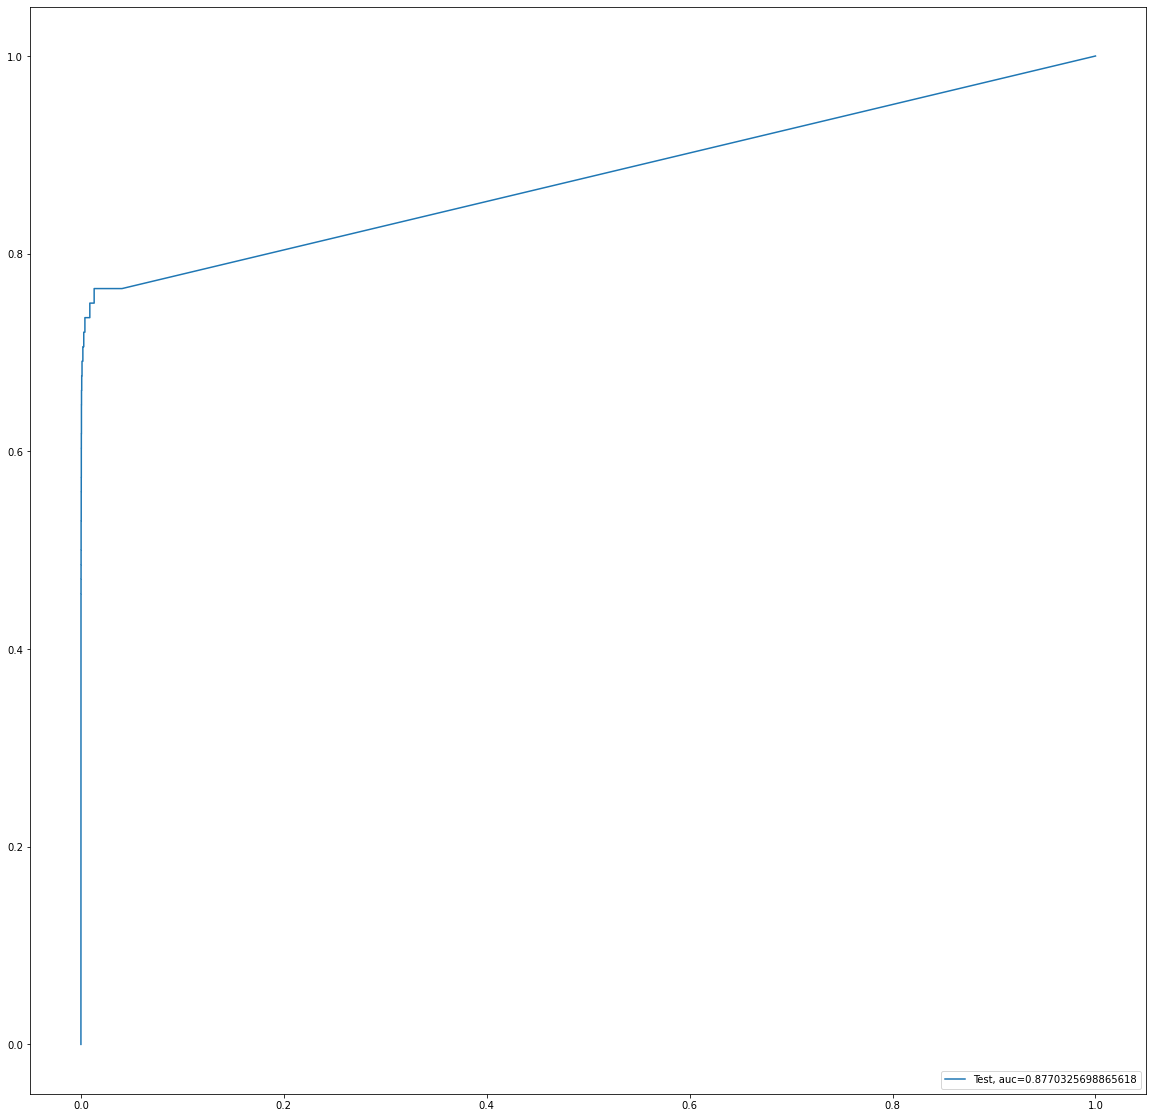

threshold value = 3.666476781854287e-05


In [82]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = svm_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

### Decision Tree

In [34]:
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(),
                            param_grid = {'criterion':['gini','entropy'],
                                          'min_samples_leaf': [1,10,100],
                                          'min_samples_split': [2, 20, 200]}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_smote, y_smote)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 22.6min finished


Best score: 0.9992889143509848
Best parameters: {'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 200}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,69.308899,2.142342,0.108114,0.027786,gini,1,2,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.998304,0.998273,0.998508,0.998618,0.998351,0.998411,0.000132,18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
1,67.865269,2.133148,0.097023,0.015737,gini,1,20,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.998472,0.998615,0.998786,0.998710,0.998851,0.998687,0.000133,17,0.999999,0.999999,0.999999,1.000000,1.000000,1.000000,1.406655e-07
2,66.281278,3.588975,0.088486,0.017001,gini,1,200,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.999057,0.999024,0.999184,0.999017,0.999265,0.999109,0.000098,10,0.999931,0.999936,0.999943,0.999936,0.999925,0.999934,6.137072e-06
3,59.633703,1.873067,0.086535,0.018603,gini,10,2,"{'criterion': 'gini', 'min_samples_leaf': 10, ...",0.998894,0.998834,0.999041,0.998882,0.999008,0.998932,0.000079,13,0.999991,0.999992,0.999992,0.999992,0.999992,0.999992,3.508485e-07
4,60.035126,1.901864,0.087511,0.012641,gini,10,20,"{'criterion': 'gini', 'min_samples_leaf': 10, ...",0.998814,0.998929,0.998961,0.998819,0.998898,0.998884,0.000059,15,0.999991,0.999992,0.999992,0.999992,0.999992,0.999992,3.102997e-07
5,60.789417,2.248636,0.108719,0.022985,gini,10,200,"{'criterion': 'gini', 'min_samples_leaf': 10, ...",0.999183,0.999282,0.999316,0.999114,0.999404,0.999260,0.000101,4,0.999902,0.999909,0.999917,0.999911,0.999896,0.999907,7.192752e-06
6,53.323530,3.023229,0.079392,0.002407,gini,100,2,"{'criterion': 'gini', 'min_samples_leaf': 100,...",0.999033,0.999356,0.999024,0.999098,0.999133,0.999129,0.000120,8,0.999632,0.999621,0.999649,0.999625,0.999612,0.999628,1.228826e-05
7,51.779464,3.851499,0.101529,0.023587,gini,100,20,"{'criterion': 'gini', 'min_samples_leaf': 100,...",0.999182,0.999285,0.998967,0.999125,0.999167,0.999145,0.000104,7,0.999629,0.999621,0.999648,0.999625,0.999612,0.999627,1.182736e-05
8,49.924027,2.480158,0.103523,0.020923,gini,100,200,"{'criterion': 'gini', 'min_samples_leaf': 100,...",0.999081,0.999194,0.999100,0.999062,0.999148,0.999117,0.000048,9,0.999629,0.999621,0.999649,0.999625,0.999612,0.999627,1.214186e-05
9,54.219740,4.405850,0.084575,0.014865,entropy,1,2,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.998744,0.998869,0.998681,0.998634,0.998854,0.998756,0.000093,16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00


In [35]:
# building the model with the hyperparameters obtained from the gridsearch and training it
dt_model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, min_samples_split=200)
dt_model.fit(X_smote,y_smote)
#making predictions and calculating the score for train and test sets
y_smote_pred = dt_model.predict(X_smote)
print('train score =',roc_auc_score(y_true=y_smote, y_score=y_smote_pred))
y_test_pred = dt_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.9972333182594714
test score = 0.9021758085205743


ROC for the test dataset 92.4%


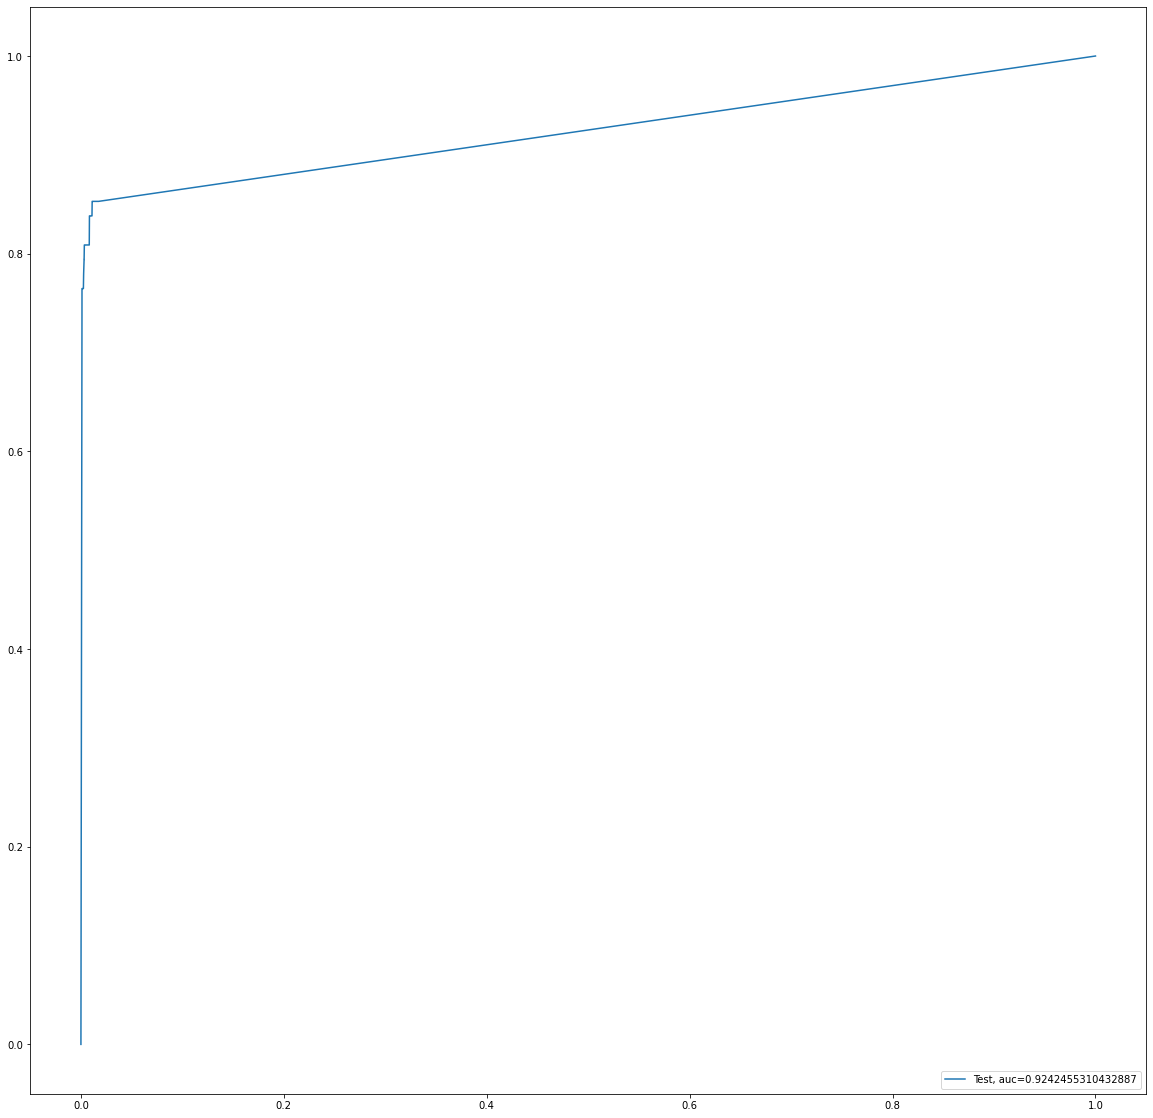

threshold value = 0.1


In [36]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = dt_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

### Random Forest

In [44]:
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator = RandomForestClassifier(max_features = 'sqrt'),
                            param_grid = {'n_estimators': [100,150,200],
                                          'min_samples_leaf': [1,5,10]}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_smote, y_smote)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 163.6min finished


Best score: 0.999994069300754
Best parameters: {'min_samples_leaf': 5, 'n_estimators': 150}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,587.840412,17.160537,2.364295,0.111015,1,100,"{'min_samples_leaf': 1, 'n_estimators': 100}",1.000000,1.000000,0.999966,0.999998,1.0,0.999993,0.000013,3,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000e+00
1,897.449373,16.756323,3.586332,0.141184,1,150,"{'min_samples_leaf': 1, 'n_estimators': 150}",0.999999,1.000000,0.999966,0.999999,1.0,0.999993,0.000013,4,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000e+00
2,1179.755188,25.103723,4.892348,0.294785,1,200,"{'min_samples_leaf': 1, 'n_estimators': 200}",1.000000,1.000000,0.999966,0.999999,1.0,0.999993,0.000014,5,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000e+00
3,565.650077,11.337280,2.378272,0.169964,5,100,"{'min_samples_leaf': 5, 'n_estimators': 100}",0.999999,0.999999,0.999959,0.999997,1.0,0.999991,0.000016,7,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,9.490533e-09
4,836.432274,21.417159,3.449663,0.130398,5,150,"{'min_samples_leaf': 5, 'n_estimators': 150}",0.999999,1.000000,0.999975,0.999997,1.0,0.999994,0.000010,1,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,6.135978e-09
5,1124.930134,18.335396,4.553114,0.162795,5,200,"{'min_samples_leaf': 5, 'n_estimators': 200}",0.999999,0.999999,0.999974,0.999996,1.0,0.999994,0.000010,2,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,7.133393e-09
6,549.325046,11.742922,2.250182,0.073656,10,100,"{'min_samples_leaf': 10, 'n_estimators': 100}",0.999997,0.999997,0.999957,0.999990,1.0,0.999988,0.000016,9,0.999999,0.999999,1.0,0.999999,0.999999,0.999999,2.481048e-07
7,832.892636,13.970618,3.363208,0.232473,10,150,"{'min_samples_leaf': 10, 'n_estimators': 150}",0.999998,0.999998,0.999967,0.999994,1.0,0.999991,0.000012,6,0.999999,0.999999,1.0,0.999999,0.999999,0.999999,2.118846e-07
8,878.546020,211.897559,2.692604,0.696923,10,200,"{'min_samples_leaf': 10, 'n_estimators': 200}",0.999997,0.999998,0.999954,0.999993,1.0,0.999988,0.000017,8,0.999999,0.999999,1.0,0.999999,0.999999,0.999999,1.766567e-07


In [45]:
# building the model with the hyperparameters obtained from the gridsearch and training it
rf_model = RandomForestClassifier(n_estimators=150, min_samples_leaf=5, max_features='sqrt')
rf_model.fit(X_smote,y_smote)
#making predictions and calculating the score for train and test sets
y_smote_pred = rf_model.predict(X_smote)
print('train score =',roc_auc_score(y_true=y_smote, y_score=y_smote_pred))
y_test_pred = rf_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.9999434730177871
test score = 0.8822524487636476


ROC for the test dataset 98.5%


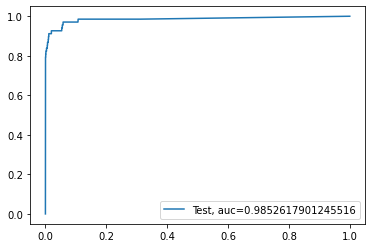

threshold value = 0.016888888888888887


In [46]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = rf_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

### XGBoost

In [117]:
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator = XGBClassifier(),
                            param_grid = {'learning_rate': [0.3, 0.6, 0.9], 
                                          'subsample': [0.5, 1]}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_smote, y_smote)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 33.0min finished


[16:47:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best score: 0.9999898113313689
Best parameters: {'learning_rate': 0.3, 'subsample': 0.5}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,279.317406,12.873414,0.406834,0.095556,0.3,0.5,"{'learning_rate': 0.3, 'subsample': 0.5}",0.999999,0.999996,0.999974,0.999994,0.999986,0.999990,0.000009,1,1.0,1.0,1.0,1.0,1.0,1.0,3.152565e-10
1,354.831156,11.826126,0.341366,0.043551,0.3,1,"{'learning_rate': 0.3, 'subsample': 1}",1.000000,0.999997,0.999967,0.999998,0.999963,0.999985,0.000016,6,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
2,228.189933,5.258640,0.334058,0.052199,0.6,0.5,"{'learning_rate': 0.6, 'subsample': 0.5}",0.999999,0.999997,0.999966,1.000000,0.999987,0.999990,0.000013,2,1.0,1.0,1.0,1.0,1.0,1.0,8.599751e-17
3,284.091326,7.103066,0.384056,0.067695,0.6,1,"{'learning_rate': 0.6, 'subsample': 1}",0.999995,0.999999,0.999983,0.999994,0.999976,0.999989,0.000008,3,1.0,1.0,1.0,1.0,1.0,1.0,7.021667e-17
4,190.108143,2.822710,0.320834,0.035327,0.9,0.5,"{'learning_rate': 0.9, 'subsample': 0.5}",0.999991,0.999995,0.999989,0.999989,0.999969,0.999987,0.000009,4,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
5,201.179762,31.349270,0.258100,0.057976,0.9,1,"{'learning_rate': 0.9, 'subsample': 1}",0.999990,0.999999,0.999977,1.000000,0.999962,0.999985,0.000014,5,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00


In [118]:
# building the model with the hyperparameters obtained from the gridsearch and training it
xgb_model = XGBClassifier(learning_rate = 0.3, subsample = 0.5)
xgb_model.fit(X_smote,y_smote)
#making predictions and calculating the score for train and test sets
y_smote_pred = xgb_model.predict(X_smote)
print('train score =',roc_auc_score(y_true=y_smote, y_score=y_smote_pred))
y_test_pred = xgb_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

[22:57:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train score = 0.9999937192241986
test score = 0.8894797744240898


ROC for the test dataset 97.3%


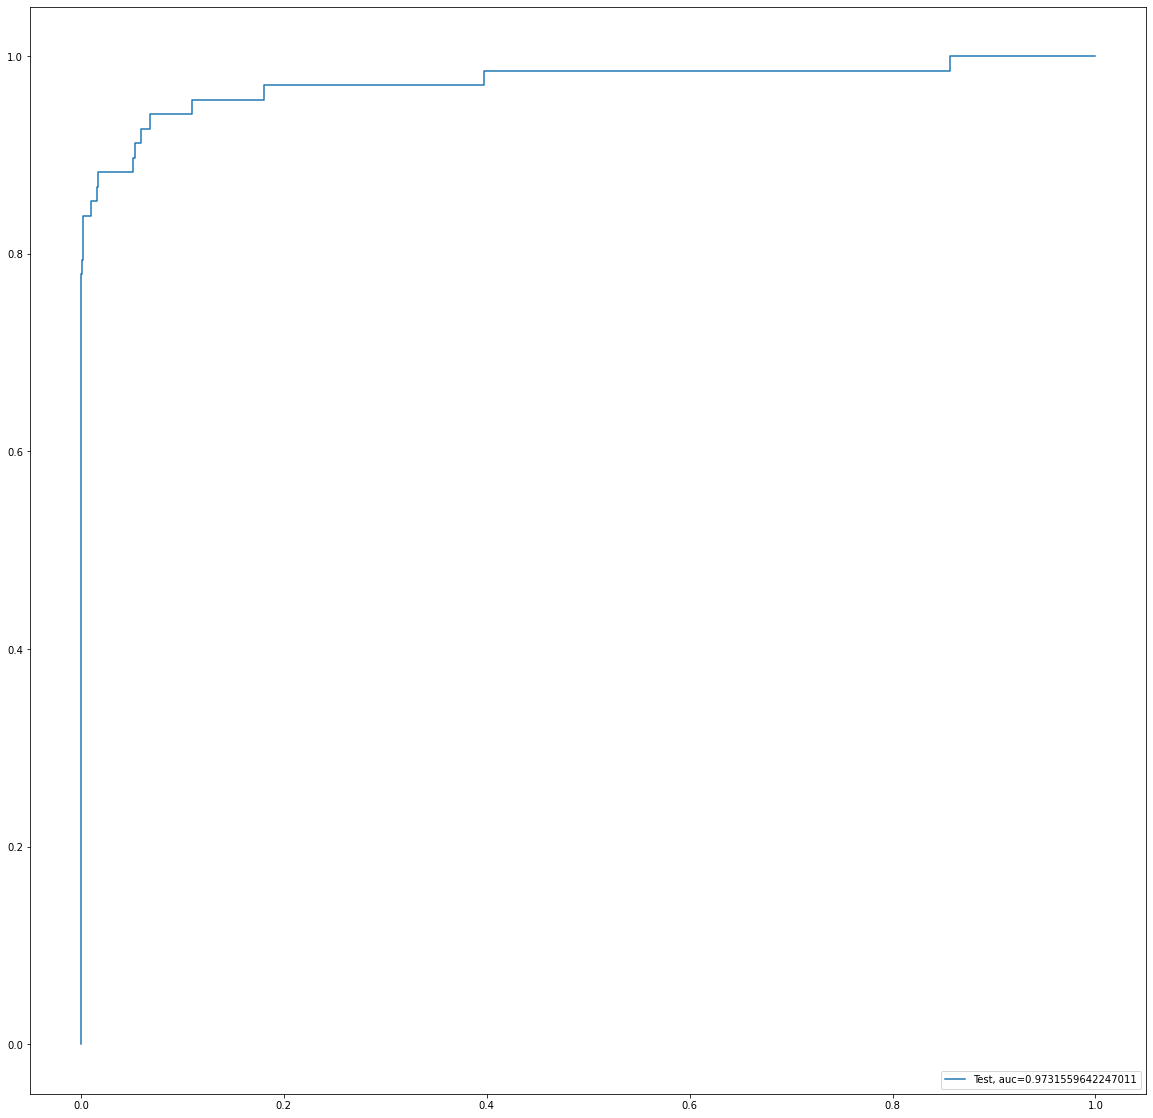

threshold value = 0.0001614996


In [119]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = xgb_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

#### From all the models fitted on the SMOTE dataset, logistic regression models have the highest test scores, but it is the Random Forest model that has the highest AUC. Since AUC is the most important metric for this project, considering the random forest model as the best model

### Print the class distribution after applying ADASYN

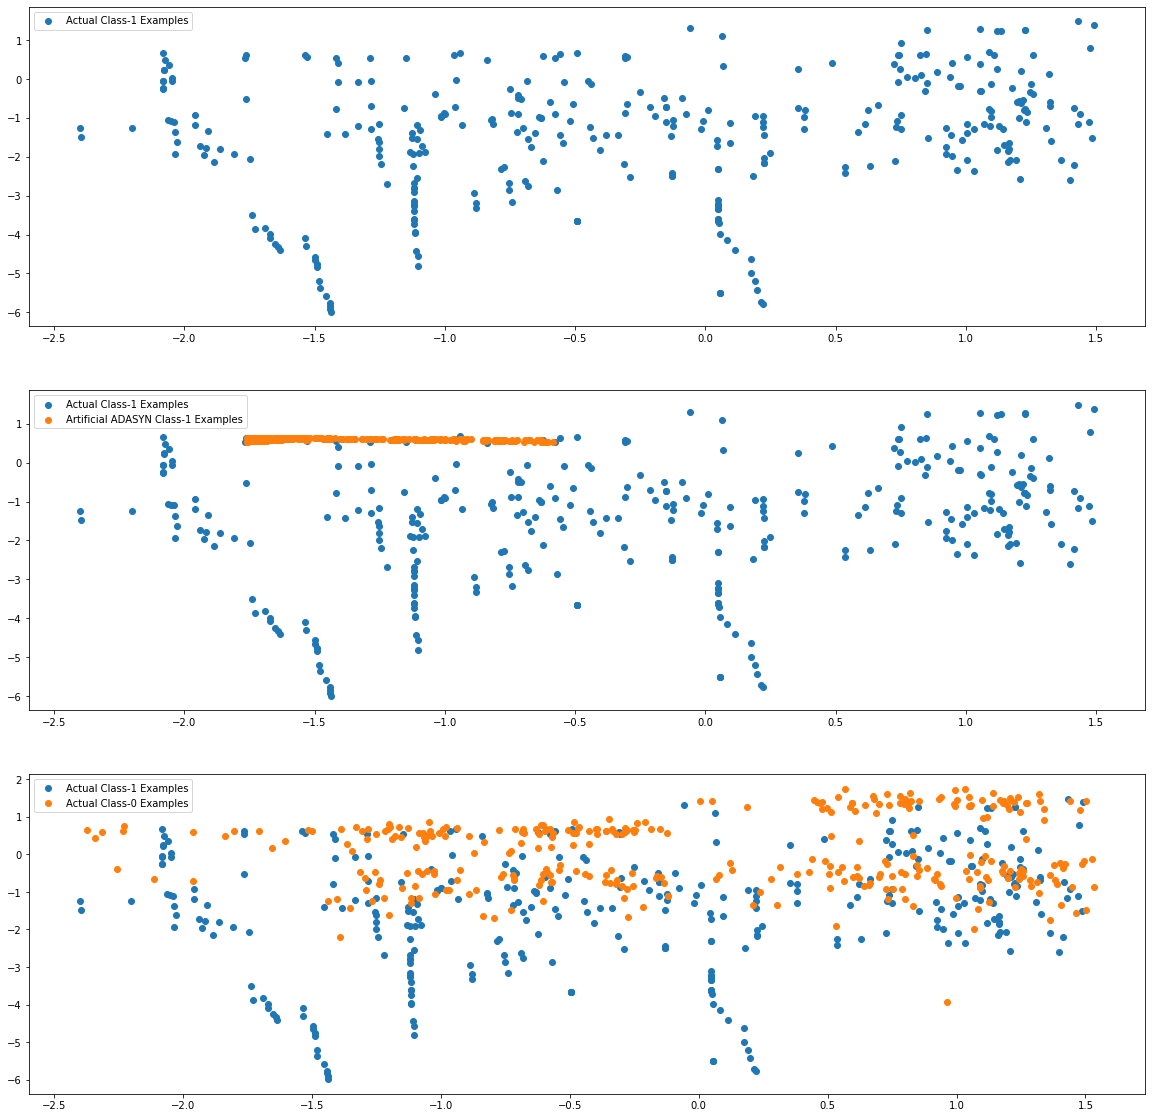

In [99]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [108]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN
X_adasyn, y_adasyn = ada.fit_resample(X_train_cv, y_train_cv)

### Logistic regression

In [51]:
#performing hyperparameter tuning for L2 model
grid_search = GridSearchCV(estimator = linear_model.LogisticRegression(),
                            param_grid = {'C': num_C}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_adasyn, y_adasyn)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   31.4s finished


Best score: 0.9348765985934927
Best parameters: {'C': 0.001}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.127905,1.077910,0.090519,0.010516,0.001,{'C': 0.001},0.882252,0.956940,0.954950,0.940356,0.939885,0.934877,0.027255,1,0.972102,0.968642,0.966882,0.971485,0.970701,0.969962,0.001933
1,3.369930,0.337181,0.082600,0.010196,0.01,{'C': 0.01},0.879873,0.958451,0.948565,0.936425,0.943669,0.933397,0.027703,2,0.972874,0.969817,0.968297,0.972571,0.971662,0.971044,0.001739
2,3.484448,0.364437,0.083634,0.010868,0.1,{'C': 0.1},0.880043,0.958463,0.946766,0.935188,0.944360,0.932964,0.027482,3,0.972872,0.969900,0.968403,0.972649,0.971738,0.971113,0.001712
3,3.276112,0.295370,0.076071,0.011786,1,{'C': 1},0.880073,0.958453,0.946531,0.935030,0.944437,0.932905,0.027449,4,0.972867,0.969904,0.968408,0.972653,0.971743,0.971115,0.001710
4,3.603483,0.652610,0.079122,0.014699,10,{'C': 10},0.880076,0.958452,0.946508,0.935015,0.944444,0.932899,0.027445,5,0.972866,0.969904,0.968408,0.972653,0.971743,0.971115,0.001710


In [52]:
# building the model with the hyperparameters obtained from the gridsearch and training it
lr_model = linear_model.LogisticRegression(C=0.001)
lr_model.fit(X_adasyn, y_adasyn)
#making predictions and calculating the score for train and test sets
y_adasyn_pred = lr_model.predict(X_adasyn)
print('train score =',roc_auc_score(y_true=y_adasyn, y_score=y_adasyn_pred))
y_test_pred = lr_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.8938051883413816
test score = 0.9254627084478652


ROC for the test dataset 97.8%


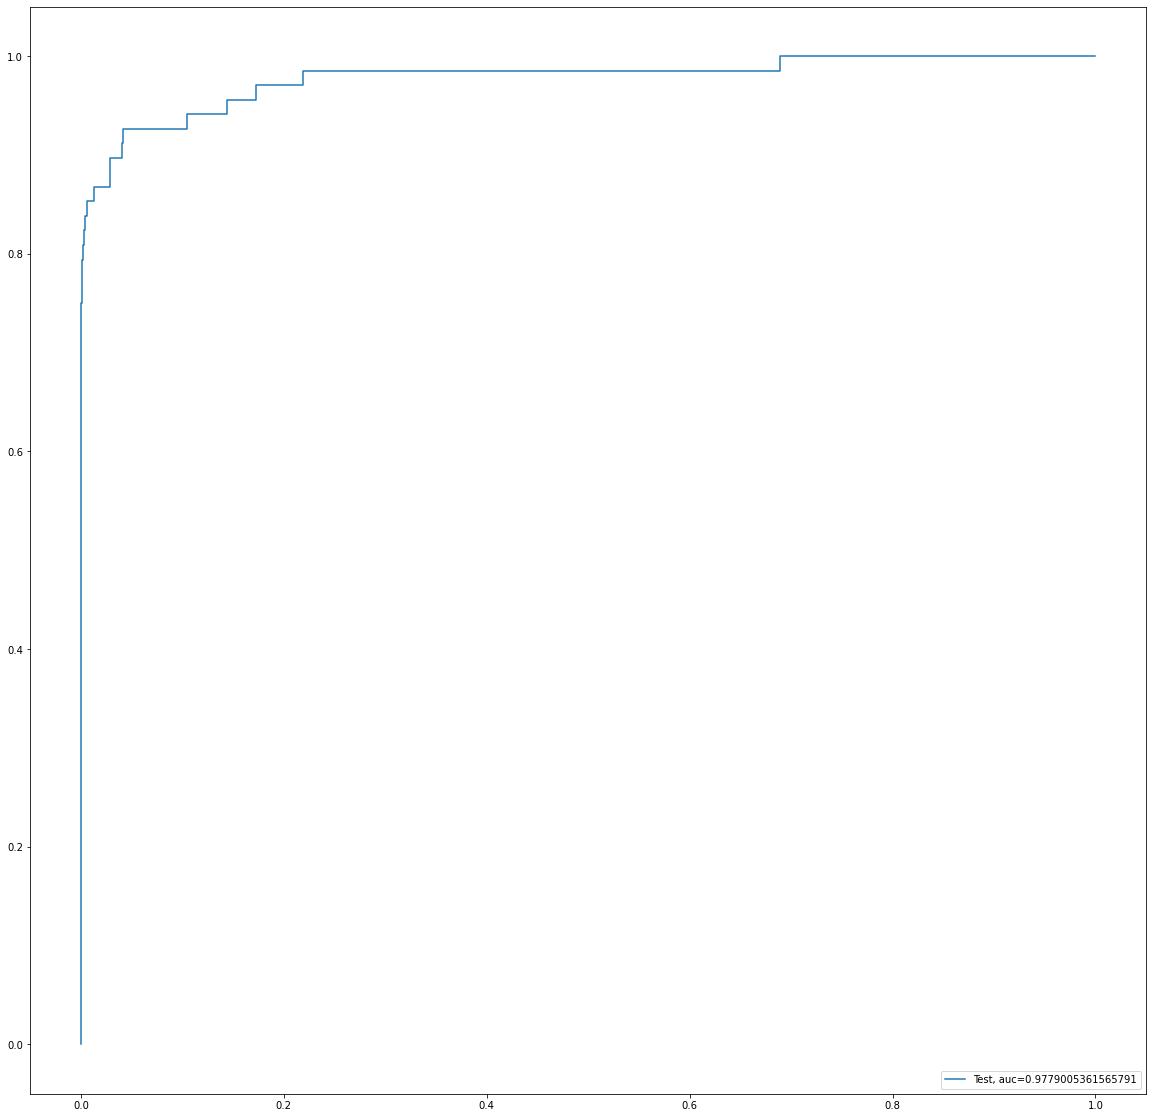

threshold value = 0.6792762335592578


In [53]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = lr_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

In [54]:
#performing hyperparameter tuning for L1 model
grid_search = GridSearchCV(estimator = linear_model.LogisticRegression(penalty='l1', solver ='liblinear'),
                            param_grid = {'C': num_C}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_adasyn, y_adasyn)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.7min finished


Best score: 0.9423225437614011
Best parameters: {'C': 0.001}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.225557,0.456753,0.253084,0.191207,0.001,{'C': 0.001},0.912507,0.957900,0.960659,0.941079,0.939468,0.942323,0.017190,1,0.969927,0.967426,0.964929,0.970227,0.969115,0.968325,0.001957
1,12.581177,0.470113,0.105752,0.010719,0.01,{'C': 0.01},0.881413,0.958366,0.948547,0.936461,0.943572,0.933672,0.027085,2,0.972822,0.969773,0.968225,0.972487,0.971593,0.970980,0.001737
2,15.456618,1.844172,0.084004,0.012658,0.1,{'C': 0.1},0.880164,0.958448,0.946765,0.935248,0.944326,0.932990,0.027430,3,0.972873,0.969901,0.968399,0.972644,0.971734,0.971110,0.001712
3,14.559951,0.874297,0.101841,0.005626,1,{'C': 1},0.880036,0.958455,0.946675,0.935113,0.944402,0.932936,0.027476,4,0.972871,0.969903,0.968408,0.972652,0.971740,0.971115,0.001711
4,13.579652,2.291145,0.088720,0.029651,10,{'C': 10},0.880046,0.958457,0.946650,0.935086,0.944416,0.932931,0.027471,5,0.972870,0.969902,0.968408,0.972651,0.971741,0.971114,0.001711


In [56]:
# building the model with the hyperparameters obtained from the gridsearch and training it
lr_model = linear_model.LogisticRegression(C=0.001, penalty='l1', solver ='liblinear')
lr_model.fit(X_adasyn, y_adasyn)
#making predictions and calculating the score for train and test sets
y_adasyn_pred = lr_model.predict(X_adasyn)
print('train score =',roc_auc_score(y_true=y_adasyn, y_score=y_adasyn_pred))
y_test_pred = lr_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.8923167243114654
test score = 0.9242944841487997


ROC for the test dataset 97.7%


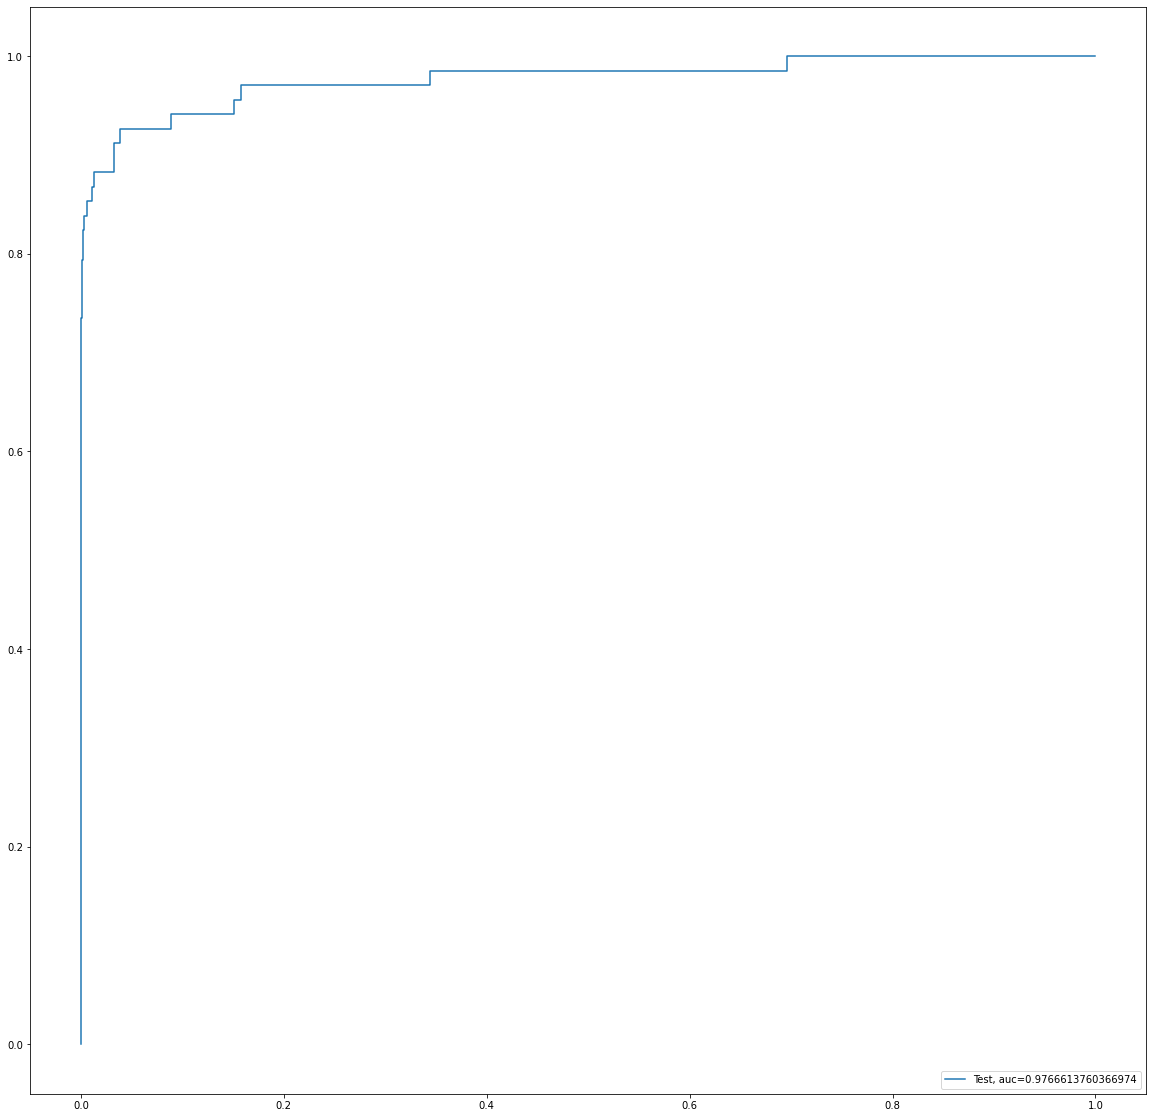

threshold value = 0.6999884699941757


In [57]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = lr_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

##### Build models on other algorithms to see the better performing on ADASYN

### KNN

In [71]:
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                            param_grid = {'n_neighbors': [3,5]}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_adasyn, y_adasyn)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 139.4min finished


Best score: 0.9852500181476186
Best parameters: {'n_neighbors': 5}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,14.168075,0.938721,706.744992,139.164930,3,{'n_neighbors': 3},0.945668,0.995794,0.997435,0.990373,0.984812,0.982817,0.019095,2,1.0,1.0,1.0,1.0,1.0,1.0,2.908876e-09
1,11.733235,2.905829,601.284841,149.607733,5,{'n_neighbors': 5},0.951554,0.997056,0.997901,0.993258,0.986480,0.985250,0.017323,1,1.0,1.0,1.0,1.0,1.0,1.0,7.154097e-09


In [72]:
# building the model with the hyperparameters obtained from the gridsearch and training it
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_adasyn,y_adasyn)
#making predictions and calculating the score for train and test sets
y_adasyn_pred = knn_model.predict(X_adasyn)
print('train score =',roc_auc_score(y_true=y_adasyn, y_score=y_adasyn_pred))
y_test_pred = knn_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.9995666264697015
test score = 0.8889898739115785


ROC for the test dataset 90.4%


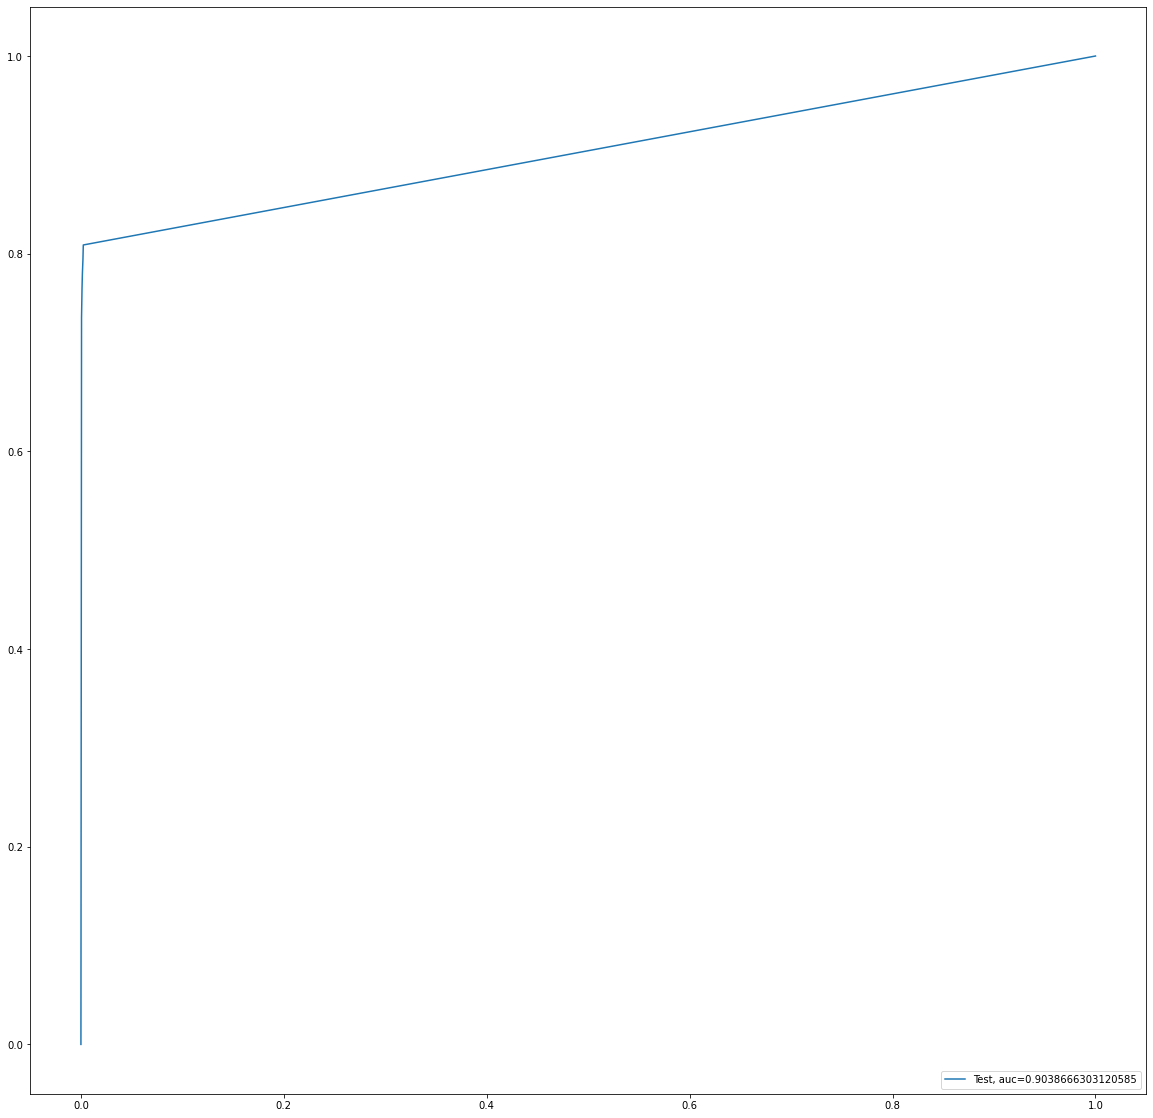

threshold value = 0.2


In [73]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = knn_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

### SVM

In [83]:
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator = svm.SVC(),
                            param_grid = {'C':[5, 10]}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_adasyn, y_adasyn)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 43.0min finished


Best score: 0.9838095286053523
Best parameters: {'C': 10}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,776.406638,220.204715,26.817629,1.882250,5,{'C': 5},0.929763,0.999869,0.999850,0.986749,0.993528,0.981952,0.026541,2,0.999908,0.999922,0.999947,0.999922,0.999911,0.999922,0.000014
1,817.363595,116.424212,13.591193,1.965206,10,{'C': 10},0.926441,0.999913,0.999883,0.993084,0.999726,0.983810,0.028803,1,0.999938,0.999952,0.999961,0.999952,0.999940,0.999949,0.000009


In [84]:
# building the model with the hyperparameters obtained from the gridsearch and training it
svm_model = svm.SVC(C = 10, probability = True)
svm_model.fit(X_adasyn,y_adasyn)
#making predictions and calculating the score for train and test sets
y_adasyn_pred = svm_model.predict(X_adasyn)
print('train score =',roc_auc_score(y_true=y_adasyn, y_score=y_adasyn_pred))
y_test_pred = svm_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.999227464891978
test score = 0.8299527981225653


ROC for the test dataset 88.0%


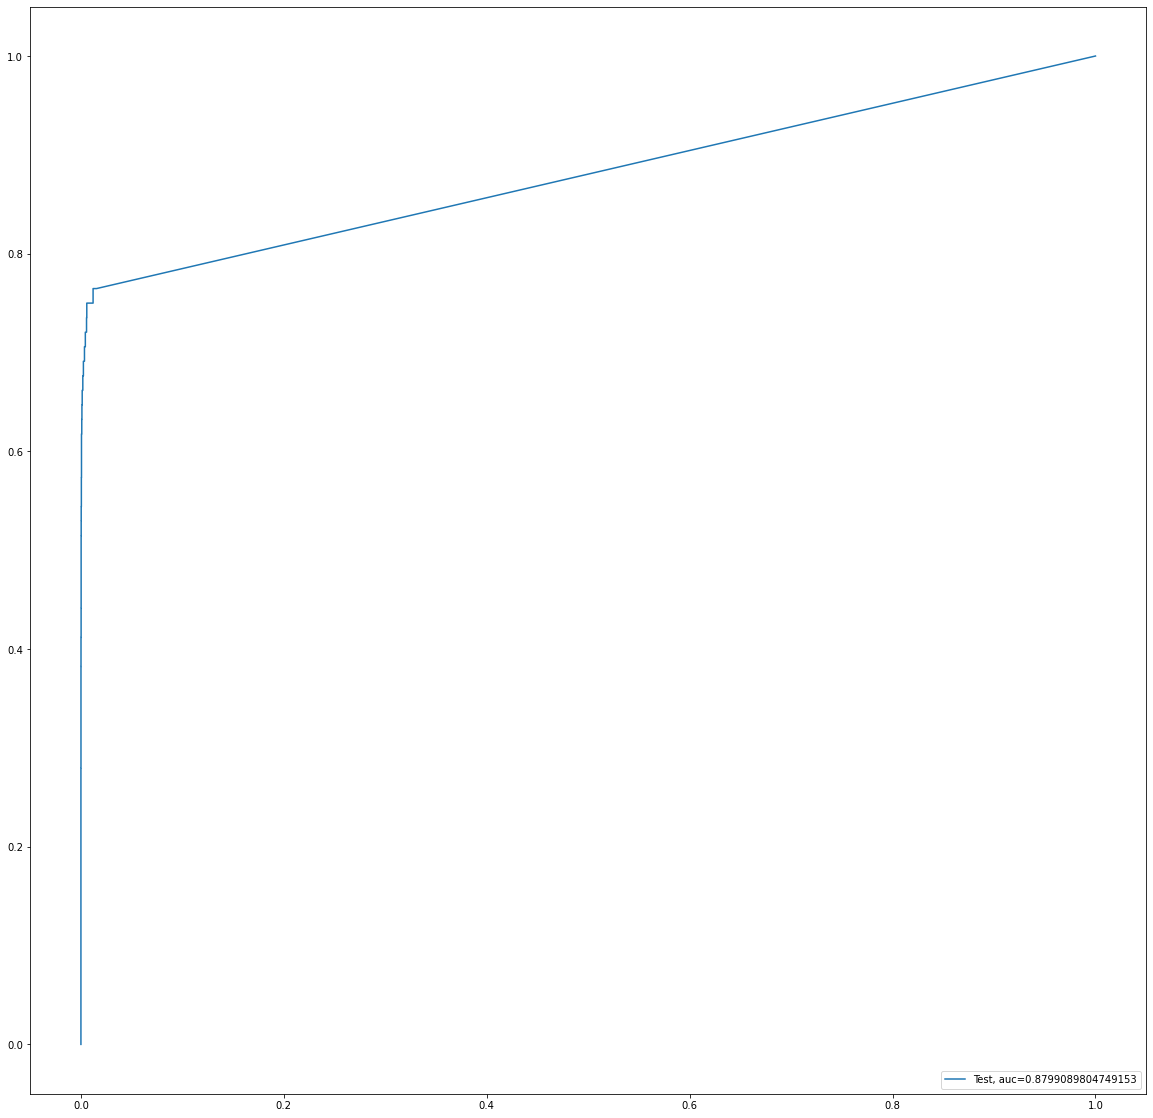

threshold value = 3.7421313895664495e-07


In [85]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = svm_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

### Decision Tree

In [59]:
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(),
                            param_grid = {'criterion':['gini','entropy'],
                                          'min_samples_leaf': [1,10,100],
                                          'min_samples_split': [2, 20, 200]}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_adasyn, y_adasyn)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 16.7min finished


Best score: 0.9591961934688055
Best parameters: {'criterion': 'gini', 'min_samples_leaf': 100, 'min_samples_split': 2}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,36.137634,0.674131,0.049395,0.007101,gini,1,2,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.904870,0.962916,0.952209,0.907414,0.918561,0.929194,0.023858,15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
1,35.310727,1.540342,0.047724,0.007472,gini,1,20,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.899667,0.959698,0.951901,0.908561,0.915417,0.927049,0.024126,16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.878350e-08
2,35.853947,0.951253,0.044350,0.004288,gini,1,200,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.902130,0.965747,0.964145,0.916589,0.936472,0.937017,0.025282,11,0.999986,0.999980,0.999968,0.999993,0.999959,0.999977,1.212431e-05
3,34.566158,1.347173,0.041941,0.003302,gini,10,2,"{'criterion': 'gini', 'min_samples_leaf': 10, ...",0.912792,0.965249,0.955319,0.926493,0.925921,0.937155,0.019762,10,0.999994,0.999994,0.999990,0.999993,0.999992,0.999993,1.345271e-06
4,32.111196,1.458615,0.046810,0.007940,gini,10,20,"{'criterion': 'gini', 'min_samples_leaf': 10, ...",0.916204,0.965894,0.955215,0.927632,0.922729,0.937535,0.019438,9,0.999994,0.999994,0.999990,0.999993,0.999992,0.999993,1.373363e-06
5,32.383841,1.667610,0.045946,0.006370,gini,10,200,"{'criterion': 'gini', 'min_samples_leaf': 10, ...",0.916612,0.967603,0.966001,0.933433,0.943421,0.945414,0.019459,7,0.999967,0.999960,0.999938,0.999982,0.999929,0.999955,1.922173e-05
6,27.066710,1.471211,0.045258,0.006101,gini,100,2,"{'criterion': 'gini', 'min_samples_leaf': 100,...",0.949213,0.966700,0.967545,0.956576,0.955947,0.959196,0.006973,1,0.999656,0.999526,0.999535,0.999749,0.999534,0.999600,8.873788e-05
7,26.303506,1.148362,0.047817,0.008228,gini,100,20,"{'criterion': 'gini', 'min_samples_leaf': 100,...",0.951079,0.966651,0.966496,0.946546,0.957026,0.957560,0.008076,2,0.999656,0.999526,0.999534,0.999748,0.999534,0.999600,8.873263e-05
8,26.726509,1.150230,0.053783,0.012954,gini,100,200,"{'criterion': 'gini', 'min_samples_leaf': 100,...",0.945174,0.966958,0.967427,0.949317,0.956776,0.957130,0.009019,3,0.999656,0.999524,0.999536,0.999750,0.999534,0.999600,8.916742e-05
9,30.980391,1.173411,0.042347,0.004145,entropy,1,2,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.887301,0.955396,0.952334,0.899956,0.913757,0.921749,0.027543,18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00


In [60]:
# building the model with the hyperparameters obtained from the gridsearch and training it
dt_model = DecisionTreeClassifier(criterion='gini', min_samples_leaf=100, min_samples_split=2)
dt_model.fit(X_adasyn,y_adasyn)
#making predictions and calculating the score for train and test sets
y_adasyn_pred = dt_model.predict(X_adasyn)
print('train score =',roc_auc_score(y_true=y_adasyn, y_score=y_adasyn_pred))
y_test_pred = dt_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.9908648760306128
test score = 0.8898359313577707


ROC for the test dataset 91.4%


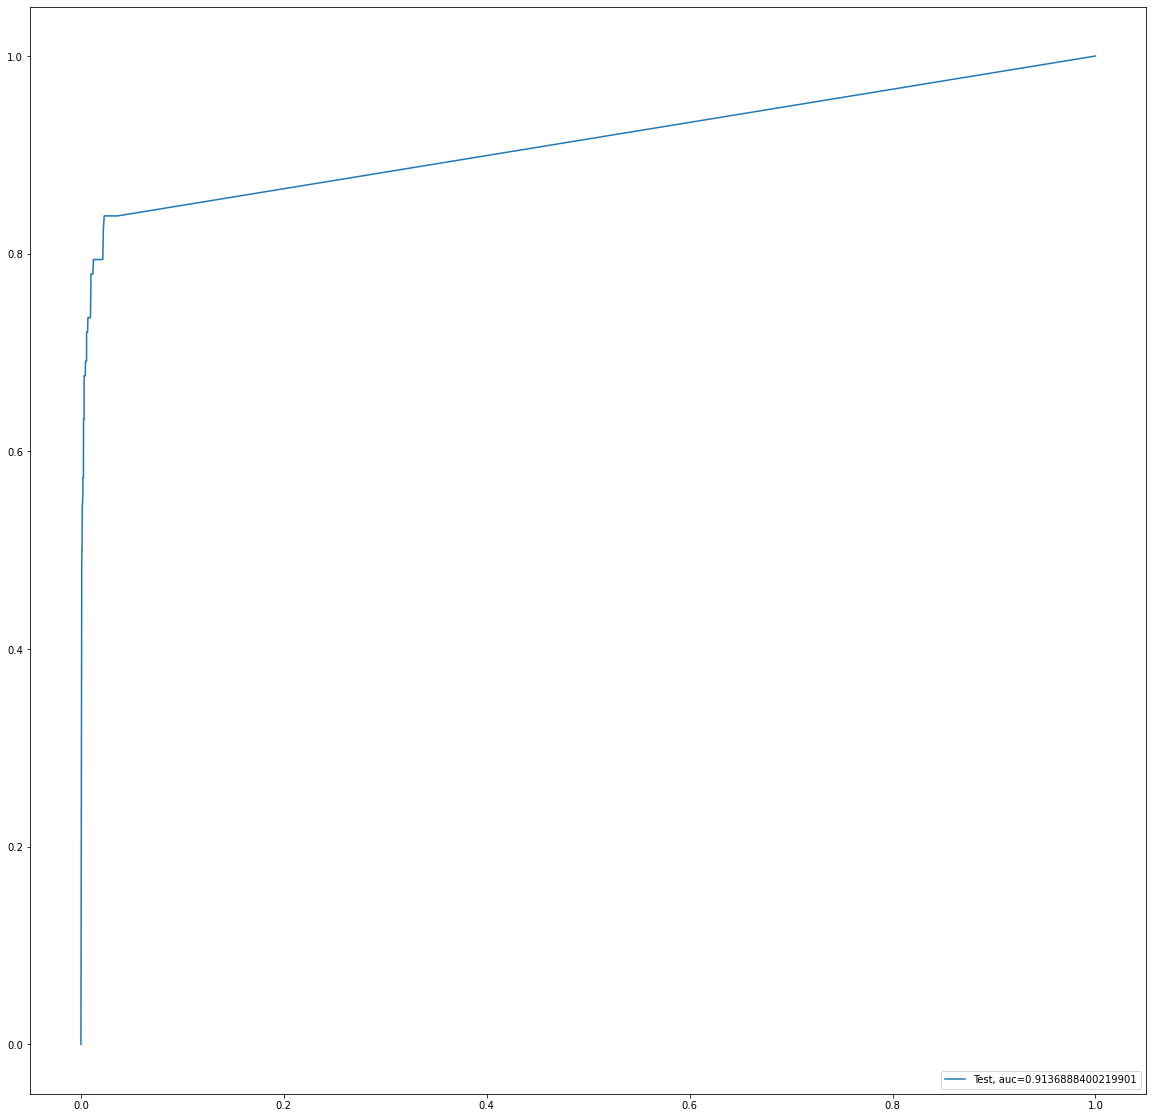

threshold value = 0.23


In [61]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = dt_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

### Random Forest

In [65]:
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator = RandomForestClassifier(max_features = 'sqrt'),
                            param_grid = {'n_estimators': [100,150,200],
                                          'min_samples_leaf': [1,5,10]}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_adasyn, y_adasyn)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 84.6min finished


Best score: 0.9987825238837675
Best parameters: {'min_samples_leaf': 5, 'n_estimators': 100}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,299.224971,3.615587,1.183789,0.117827,1,100,"{'min_samples_leaf': 1, 'n_estimators': 100}",0.987130,0.999766,0.999772,0.999356,0.999586,0.997122,0.004998,7,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
1,443.231296,4.532842,1.770702,0.141949,1,150,"{'min_samples_leaf': 1, 'n_estimators': 150}",0.978095,0.999807,0.999799,0.998650,0.999019,0.995074,0.008501,9,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
2,588.668443,7.652672,2.240302,0.082213,1,200,"{'min_samples_leaf': 1, 'n_estimators': 200}",0.984029,0.999741,0.999878,0.999584,0.999672,0.996581,0.006277,8,1.0,1.0,1.0,1.0,1.0,1.0,4.965068e-17
3,285.807526,3.747562,1.180059,0.144455,5,100,"{'min_samples_leaf': 5, 'n_estimators': 100}",0.996579,0.999674,0.999847,0.998655,0.999158,0.998783,0.001178,1,1.0,1.0,1.0,1.0,1.0,1.0,6.464430e-09
4,431.331978,6.465422,1.834940,0.184512,5,150,"{'min_samples_leaf': 5, 'n_estimators': 150}",0.993143,0.999711,0.999787,0.999527,0.998065,0.998047,0.002531,6,1.0,1.0,1.0,1.0,1.0,1.0,7.499037e-09
5,568.804857,8.589348,2.083369,0.030509,5,200,"{'min_samples_leaf': 5, 'n_estimators': 200}",0.994321,0.999753,0.999807,0.999451,0.999358,0.998538,0.002115,3,1.0,1.0,1.0,1.0,1.0,1.0,6.489676e-09
6,276.555954,4.464293,1.067038,0.041359,10,100,"{'min_samples_leaf': 10, 'n_estimators': 100}",0.994812,0.999412,0.999687,0.998517,0.999183,0.998322,0.001797,4,1.0,1.0,1.0,1.0,1.0,1.0,3.519021e-08
7,414.459808,5.869415,1.538089,0.021803,10,150,"{'min_samples_leaf': 10, 'n_estimators': 150}",0.993857,0.999513,0.999711,0.999104,0.999267,0.998290,0.002226,5,1.0,1.0,1.0,1.0,1.0,1.0,3.368760e-08
8,501.304109,60.515783,1.915347,0.390430,10,200,"{'min_samples_leaf': 10, 'n_estimators': 200}",0.995740,0.999637,0.999721,0.999213,0.999286,0.998719,0.001502,2,1.0,1.0,1.0,1.0,1.0,1.0,3.348597e-08


In [66]:
# building the model with the hyperparameters obtained from the gridsearch and training it
rf_model = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, max_features='sqrt')
rf_model.fit(X_adasyn,y_adasyn)
#making predictions and calculating the score for train and test sets
y_adasyn_pred = rf_model.predict(X_adasyn)
print('train score =',roc_auc_score(y_true=y_adasyn, y_score=y_adasyn_pred))
y_test_pred = rf_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

train score = 0.9999466137212414
test score = 0.87491206913878


ROC for the test dataset 98.3%


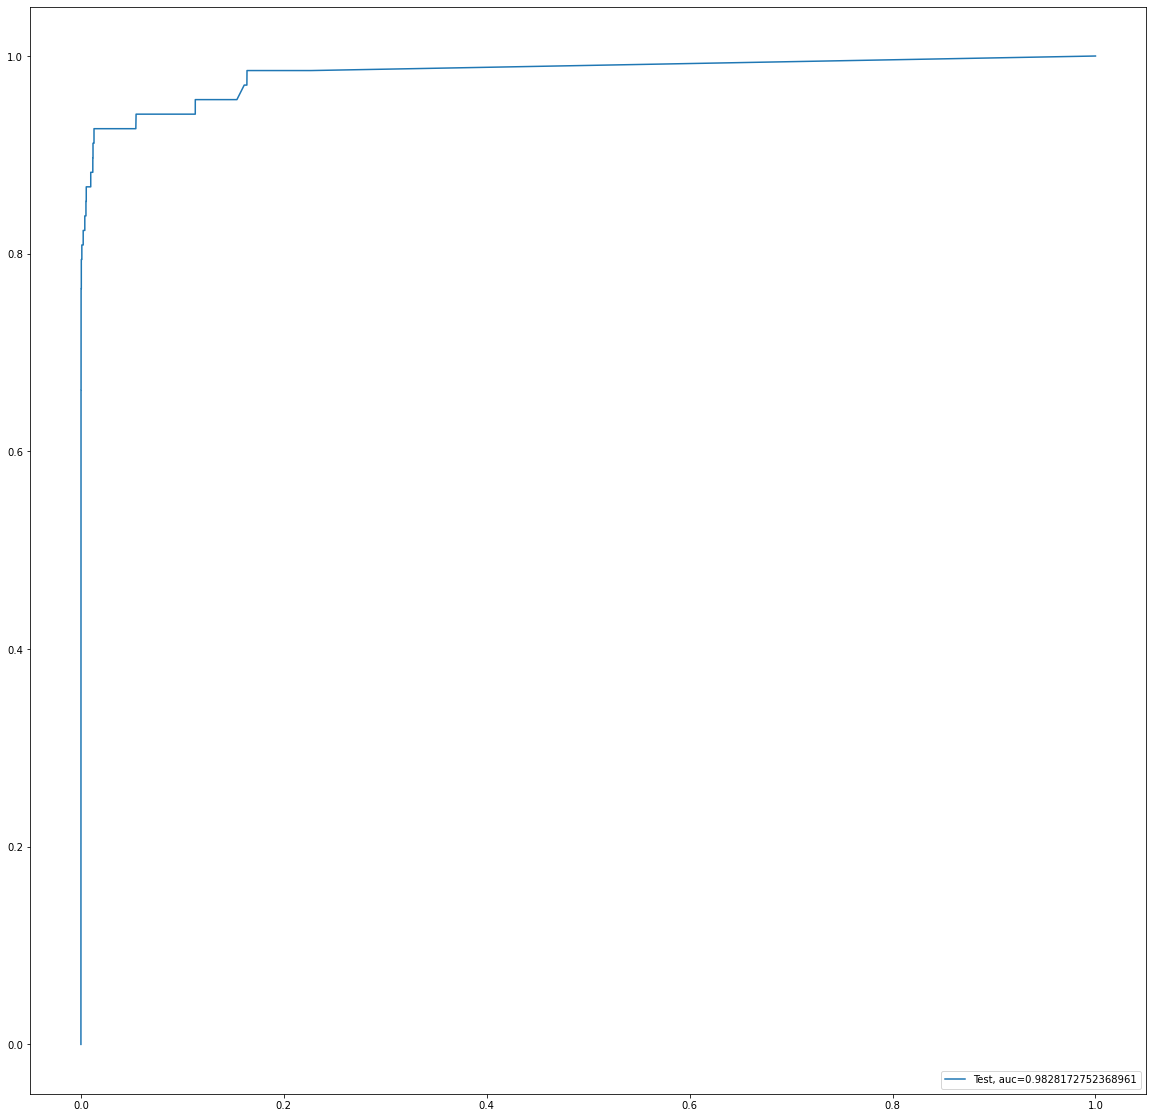

threshold value = 0.04772150072150073


In [67]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = rf_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

### XGBoost

In [111]:
#perform hyperparameter tuning
grid_search = GridSearchCV(estimator = XGBClassifier(),
                            param_grid = {'learning_rate': [0.3, 0.6, 0.9], 
                                          'subsample': [0.5, 1]}, 
                            scoring= 'roc_auc', 
                            cv = cv, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)
grid_result = grid_search.fit(X_adasyn, y_adasyn)
#print the evaluation result by choosing a evaluation metric
print("Best score:",grid_result.best_score_)
#print the optimum value of hyperparameters
print("Best parameters:",grid_result.best_params_)
cv_results = pd.DataFrame(grid_result.cv_results_)
cv_results

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 42.2min finished


[15:59:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best score: 0.9999900014201822
Best parameters: {'learning_rate': 0.3, 'subsample': 0.5}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,364.304062,35.924128,2.379656,0.991894,0.3,0.5,"{'learning_rate': 0.3, 'subsample': 0.5}",0.999996,1.000000,0.999979,1.000000,0.999975,0.999990,0.000011,1,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
1,538.381914,16.815941,0.737418,0.269181,0.3,1,"{'learning_rate': 0.3, 'subsample': 1}",0.999988,1.000000,0.999978,0.999999,0.999970,0.999987,0.000012,2,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
2,292.068420,73.476222,0.495247,0.146867,0.6,0.5,"{'learning_rate': 0.6, 'subsample': 0.5}",0.999978,0.999999,0.999964,0.999989,0.999953,0.999976,0.000017,6,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
3,289.832667,5.405131,0.374228,0.028272,0.6,1,"{'learning_rate': 0.6, 'subsample': 1}",0.999974,1.000000,0.999969,1.000000,0.999971,0.999983,0.000014,3,1.0,1.0,1.0,1.0,1.0,1.0,4.965068e-17
4,194.554511,5.504895,0.291554,0.061577,0.9,0.5,"{'learning_rate': 0.9, 'subsample': 0.5}",0.999980,0.999998,0.999964,0.999999,0.999958,0.999980,0.000017,5,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
5,232.004748,9.587601,0.375064,0.052768,0.9,1,"{'learning_rate': 0.9, 'subsample': 1}",0.999984,1.000000,0.999967,0.999999,0.999964,0.999983,0.000015,4,1.0,1.0,1.0,1.0,1.0,1.0,4.965068e-17


In [115]:
# building the model with the hyperparameters obtained from the gridsearch and training it
XGBClassifier(learning_rate = 0.3, subsample = 0.5)
xgb_model.fit(X_adasyn,y_adasyn)
#making predictions and calculating the score for train and test sets
y_adasyn_pred = xgb_model.predict(X_adasyn)
print('train score =',roc_auc_score(y_true=y_adasyn, y_score=y_adasyn_pred))
y_test_pred = xgb_model.predict(X_test_cv)
print('test score =',roc_auc_score(y_true=y_test_cv, y_score=y_test_pred))

[16:09:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train score = 1.0
test score = 0.8747738920711486


ROC for the test dataset 97.0%


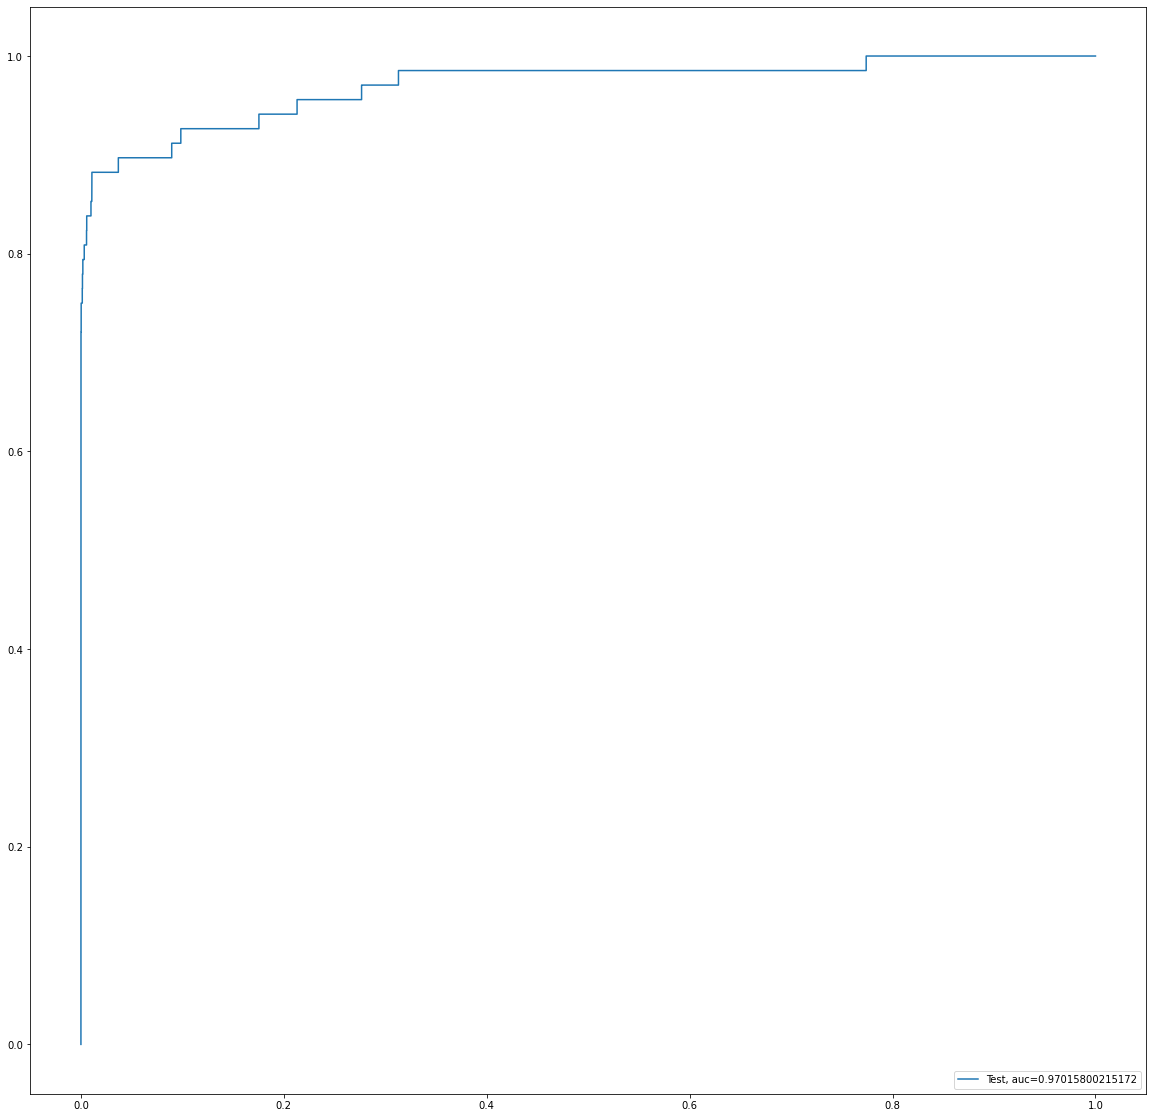

threshold value = 0.0001733085


In [116]:
#calculating the threshold value, parameters and plotting the ROC curve for the model
y_pred_probs = xgb_model.predict_proba(X_test_cv)[:,1]
roc_value = roc_auc_score(y_test_cv, y_pred_probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
print("threshold value =",threshold)

#### From all the models fit on the ADASYN dataset, it is the logistic regression model which has the highest test scores, but it is the Random Forest model which has the max AUC. Hence choosing Random forest model as the best model

### From all the models fit on the various types of input data, it is the random forest model fit on the SMOTE dataset that has the max AUC. Hence choosing it as the best model

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [129]:
# perform the best oversampling method on X_train & y_train
clf = RandomForestClassifier(n_estimators=150, min_samples_leaf=5, max_features='sqrt')  #initialise the model with optimum hyperparameters
clf.fit(X_smote, y_smote ) # fit on the balanced dataset
y_test_pred = clf.predict(X_test)
print('test score =',roc_auc_score(y_true=y_test, y_score=y_test_pred)) #print the evaluation score on the X_test by choosing the best evaluation metric

test score = 0.912021473962385


### Print the important features of the best model to understand the dataset

Top var = 15
2nd Top var = 5
3rd Top var = 11


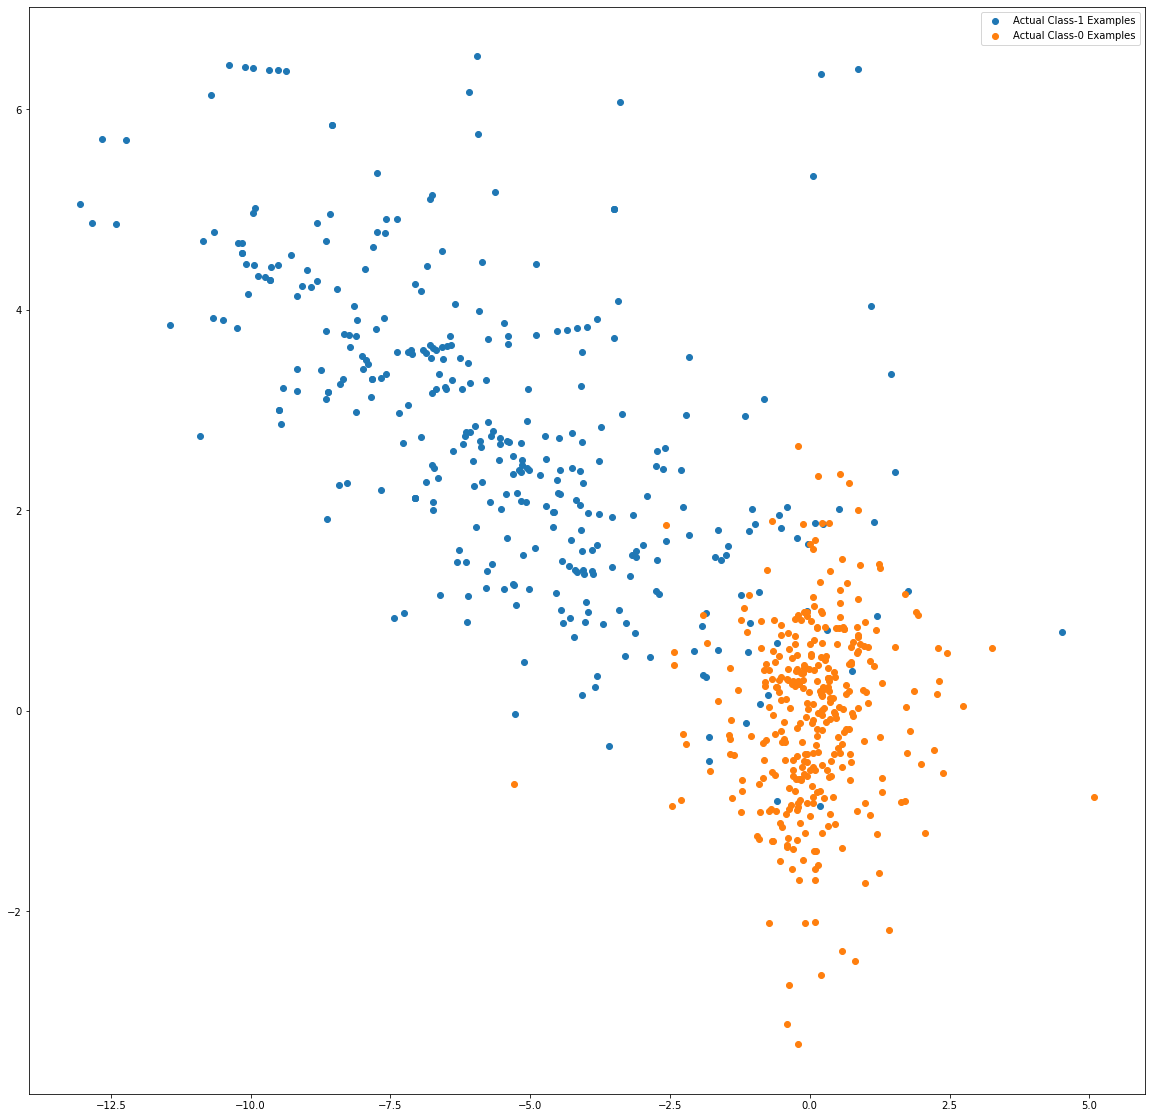

In [89]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [130]:
y_pred_probs = clf.predict_proba(X_smote)[:,1]
print('Train auc =', metrics.roc_auc_score(y_smote, y_pred_probs))
fpr, tpr, thresholds = metrics.roc_curve(y_smote, y_pred_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9999999827611608
0.6712201872201868


#### THE END